<a href="https://colab.research.google.com/github/igcampos/Mbrito-Seguros/blob/master/Project_Mbrito_Corretora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Mbrito Corretora de Seguros

## Aprendizado

Esse projeto teve o intuito principal de auxiliar no aprendizado sobre a utilização de machine learning na análise de risco do seguro automóvel.

Para solucionar o problema de negócio, foi preciso adquirir o conhecimento de algumas técnicas, desde o modelo de classificação como o XGboost, a métrica de Gini Coefficient e técnicas de tratamento de dados desbalanceados como o undersampling. 

## Sumário
1. Entendimento do Negócio
2. Introduçao
3. Objetivo
4. Overview dos dados
5. Data Wrangling
6. Baseline
7. Aplicação do Modelo Random Forest
8. Aplicação do Modelo XGboost
9. Conclusão

## Entendimento do Negócio

Será criado uma simulação de negócio onde a empresa Mbrito Corretora de Seguros está querendo predizer a probabilidade de um cliente que contratou o seguro irá acionar o sinistro no futuro. 

Os dados foram retirados do kaggle para salientar a simulação de negócio.

https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data

### Introdução

A corretora de seguros Mbrito atua no ramo de seguros a mais de dez anos e notaram que os valores são muito elevados e não conseguem descriminar o cliente que é exemplar no trânsito com aquele que tem uma má atitude. 

Essa dificuldade em segmentar a clientela, resulta em preços elevados para clientes que estão contratando o seguro pela primeira vez e beneficia o cliente com mais tempo de seguro. 

E para solucionar essa situação a Mbrito contratou um cientista de dados para predizer com mais precisão a probabilidade do cliente acionar o seguro no ano seguinte. 

Com esse resultado em mãos será possível para a Mbrito Corretora lançar campanhas com descontos para aqueles clientes com o menor risco de acionar o seguro, beneficiando os melhores clientes.  

### Objetivo

Predizer a probabilidade do cliente acionar o seguro no ano seguinte.  

### Overview dos Dados

* As variáveis estão agrupadas em grupos como ind, reg, car, calc;

* Além do agrupamento, as variáveis tem o prefixo que indicam que são binárias (bin) ou categóricas (cat). As variáveis sem o prefixo são ou continuas ou ordinais; 

* Os dados com valores de -1 são os que não foram preenchidos; 

* A coluna target é a variável alvo e indica se o cliente acionou o seguro ou não (variável binária);




### Data Wrangling

In [188]:
#Montando o drive do Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [189]:
#Importando algumas bibliotecas importantes para a EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

sns.set_style('darkgrid')

**Análise dos Dados de Treino**

In [190]:
df_data = pd.read_csv('/content/drive/My Drive/Colab/train_porto_seguro.csv')

In [191]:
df_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [192]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Existem 595212 linhas e 59 colunas nos dados, sendo a maioria do tipo int64.

In [193]:
df_data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


Não existem dados Nan, os dados faltantes foram substituidos pelo valor -1.

In [194]:
df_data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

As seguintes colunas apresentam dados com valores de -1, que são dados faltantes, ps_ind_02_cat, ps_ind_04_cat, ps_ind_05_cat, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_05_cat, ps_car_07_cat, ps_car_09_cat, ps_car_11, ps_car_12 e ps_car_14.

No total, temos que 13 colunas apresentam dados faltantes. 

O desvio padrão da variável alvo é relativamente baixo, indicando que os dados podem estar desbalanceados. 







**Análise de Distribuições**

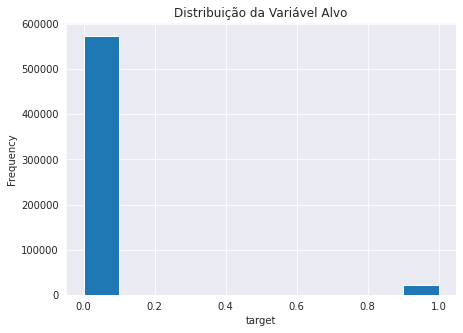

In [195]:
#sns.distplot(a=df_data['target'], kde=False)
df_data['target'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável Alvo')
plt.xlabel('target')
plt.show()

Confirmando o que foi dito acima, fica evidente que existem mais casos que não acionaram o seguro, valor igual a zero. Logo, as classes estão desbalanceadas e devem ser submetidos ao um tratamento de undersample ou oversample. 

**Análise de variáveis ind**

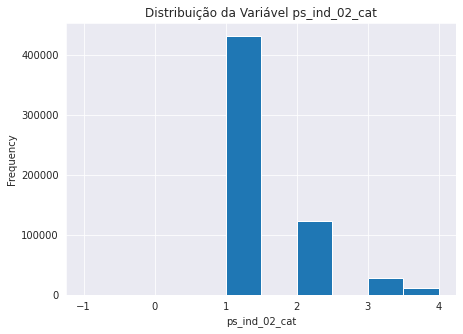

In [196]:
df_data['ps_ind_02_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_02_cat')
plt.xlabel('ps_ind_02_cat')
plt.show()

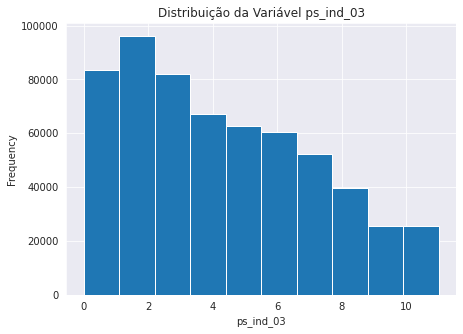

In [197]:
df_data['ps_ind_03'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_03')
plt.xlabel('ps_ind_03')
plt.show()

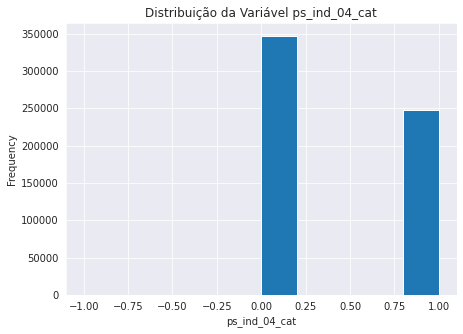

In [198]:
df_data['ps_ind_04_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_04_cat')
plt.xlabel('ps_ind_04_cat')
plt.show()

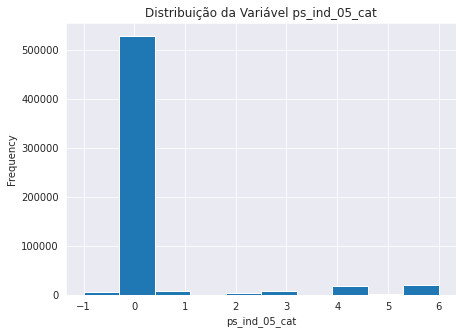

In [199]:
df_data['ps_ind_05_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_05_cat')
plt.xlabel('ps_ind_05_cat')
plt.show()

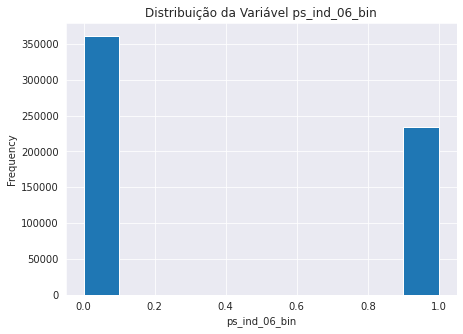

In [200]:
df_data['ps_ind_06_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_06_bin')
plt.xlabel('ps_ind_06_bin')
plt.show()

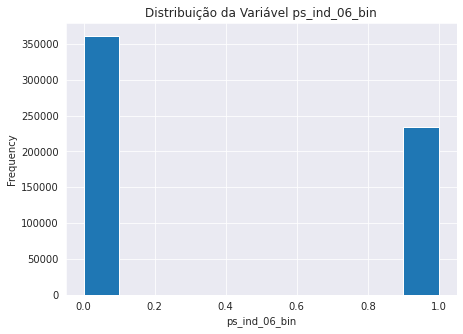

In [201]:
df_data['ps_ind_06_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_06_bin')
plt.xlabel('ps_ind_06_bin')
plt.show()

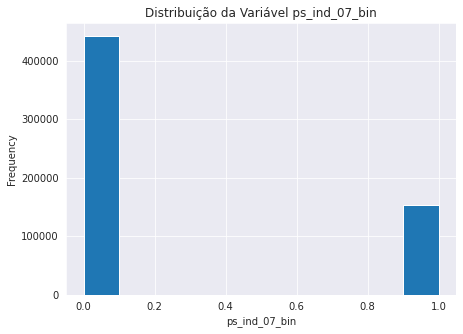

In [202]:
df_data['ps_ind_07_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_07_bin')
plt.xlabel('ps_ind_07_bin')
plt.show()

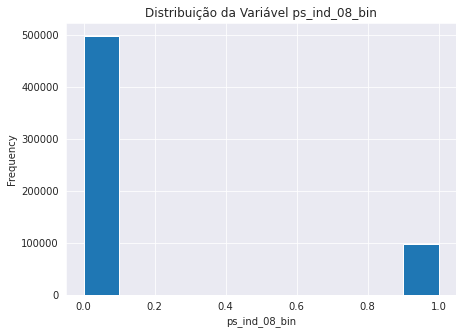

In [203]:
df_data['ps_ind_08_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_08_bin')
plt.xlabel('ps_ind_08_bin')
plt.show()

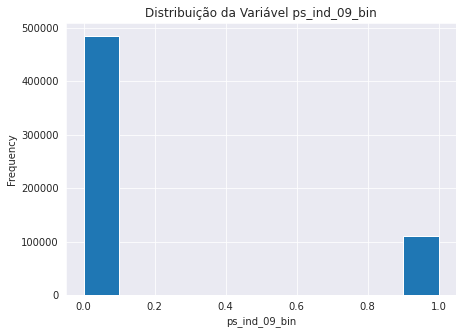

In [204]:
df_data['ps_ind_09_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_09_bin')
plt.xlabel('ps_ind_09_bin')
plt.show()

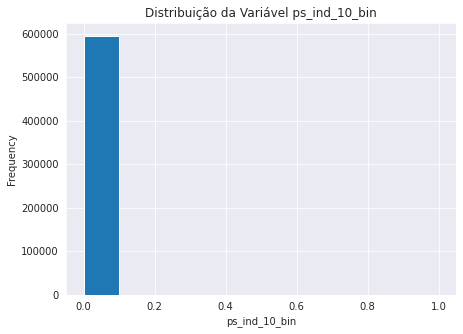

In [205]:
df_data['ps_ind_10_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_10_bin')
plt.xlabel('ps_ind_10_bin')
plt.show()

Nessa coluna existe um desbalanceamento com tendência para o valor 0. 

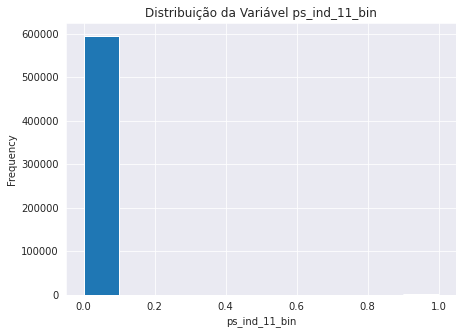

In [206]:
df_data['ps_ind_11_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_11_bin')
plt.xlabel('ps_ind_11_bin')
plt.show()

Nessa coluna também existe um desbalanceamento com tendência para o valor 0. 

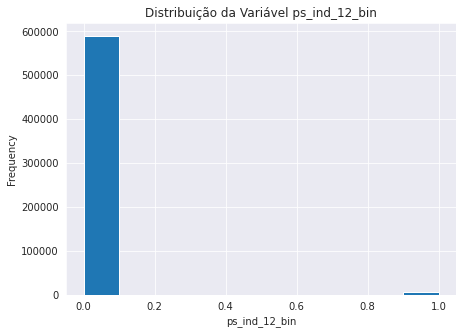

In [207]:
df_data['ps_ind_12_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_12_bin')
plt.xlabel('ps_ind_12_bin')
plt.show()

Outra coluna com desbaleceamento com tendência com valor zero. 

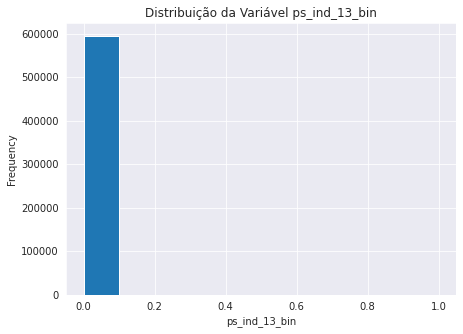

In [208]:
df_data['ps_ind_13_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_13_bin')
plt.xlabel('ps_ind_13_bin')
plt.show()

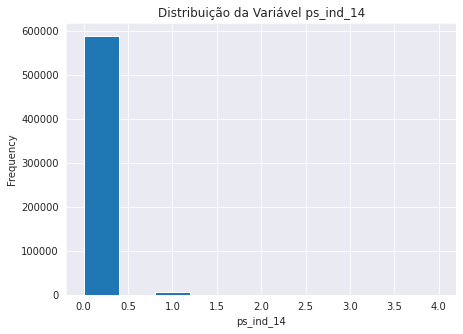

In [209]:
df_data['ps_ind_14'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_14')
plt.xlabel('ps_ind_14')
plt.show()

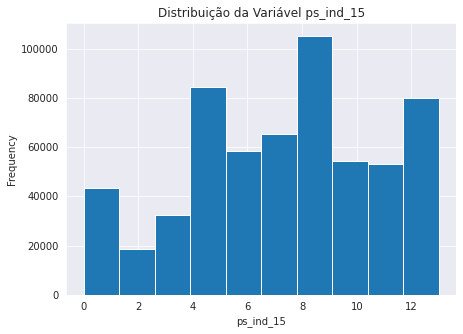

In [210]:
df_data['ps_ind_15'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_15')
plt.xlabel('ps_ind_15')
plt.show()

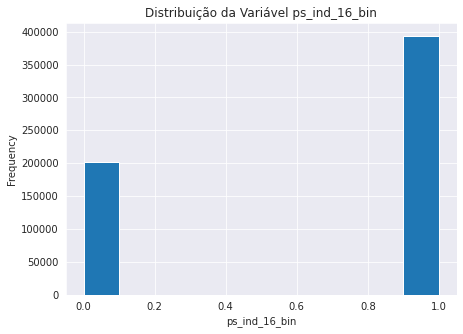

In [211]:
df_data['ps_ind_16_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_16_bin')
plt.xlabel('ps_ind_16_bin')
plt.show()

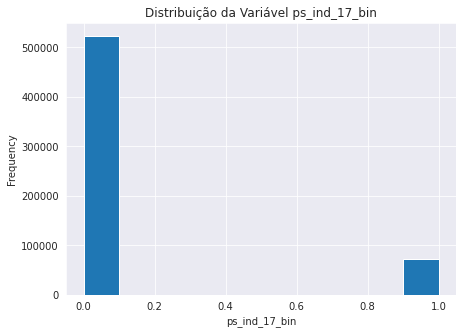

In [212]:
df_data['ps_ind_17_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_17_bin')
plt.xlabel('ps_ind_17_bin')
plt.show()

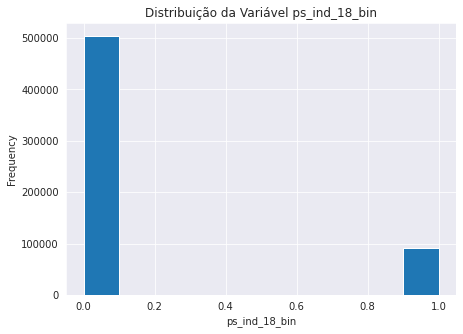

In [213]:
df_data['ps_ind_18_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_ind_18_bin')
plt.xlabel('ps_ind_18_bin')
plt.show()

Em algumas das colunas das variáveis ind estão desbalanceadas. 

**Análise das variáveis reg_**

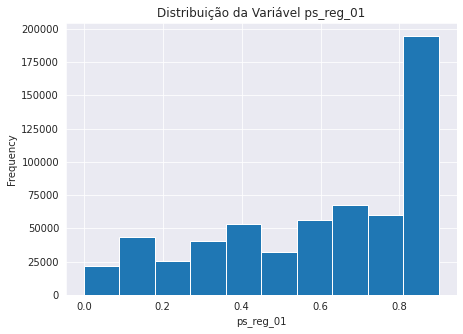

In [214]:
df_data['ps_reg_01'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_reg_01')
plt.xlabel('ps_reg_01')
plt.show()

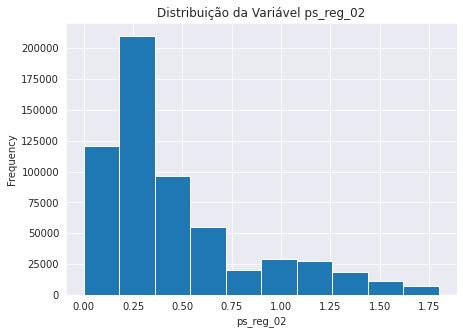

In [215]:
df_data['ps_reg_02'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_reg_02')
plt.xlabel('ps_reg_02')
plt.show()

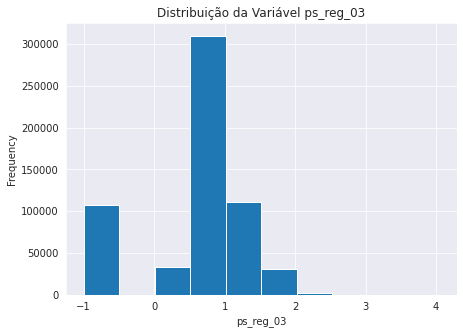

In [216]:
df_data['ps_reg_03'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_reg_03')
plt.xlabel('ps_reg_03')
plt.show()

Na variável acima, existe uma quantidade grande de números faltantes.

**Análise das variáveis car_**

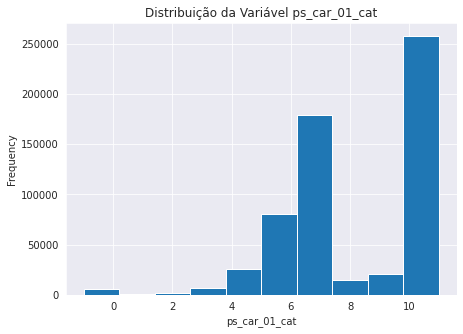

In [217]:
df_data['ps_car_01_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_01_cat')
plt.xlabel('ps_car_01_cat')
plt.show()

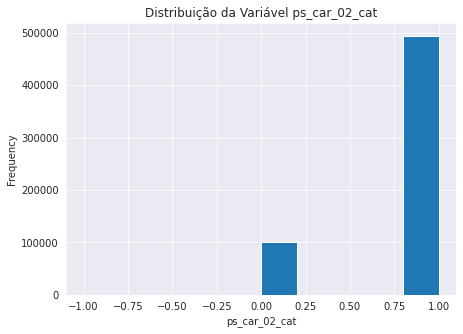

In [218]:
df_data['ps_car_02_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_02_cat')
plt.xlabel('ps_car_02_cat')
plt.show()

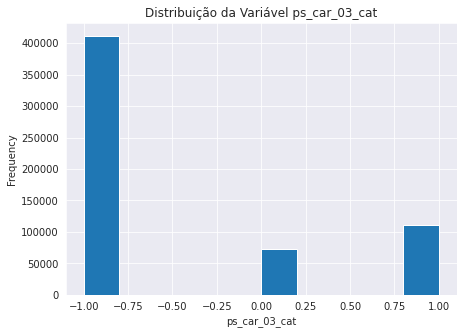

In [219]:
df_data['ps_car_03_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_03_cat')
plt.xlabel('ps_car_03_cat')
plt.show()

Essa coluna contêm a maioria dos valores faltantes, ou seja, é uma coluna eletiva para ser dropada. 

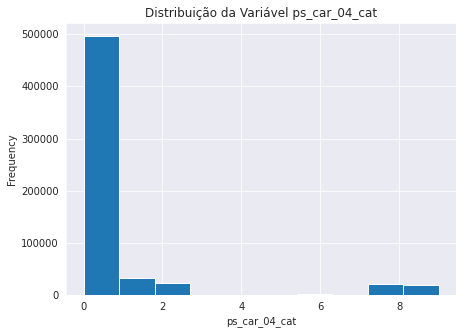

In [220]:
df_data['ps_car_04_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_04_cat')
plt.xlabel('ps_car_04_cat')
plt.show()

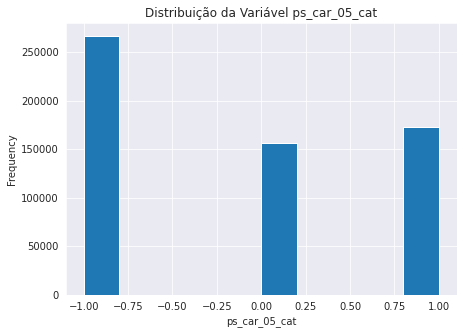

In [221]:
df_data['ps_car_05_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_05_cat')
plt.xlabel('ps_car_05_cat')
plt.show()

Outra coluna que a maioria dos dados são de valores -1. 

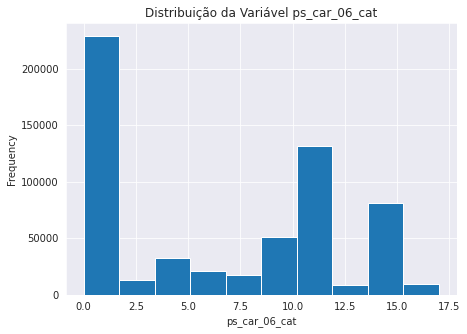

In [222]:
df_data['ps_car_06_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_06_cat')
plt.xlabel('ps_car_06_cat')
plt.show()

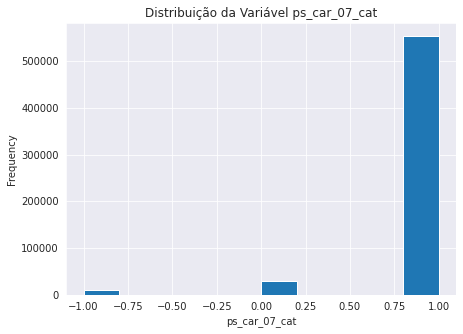

In [223]:
df_data['ps_car_07_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_07_cat')
plt.xlabel('ps_car_07_cat')
plt.show()

Nessa coluna existem valores não preenchidos, que podem ser substituidos pelo valor mais frequente. 

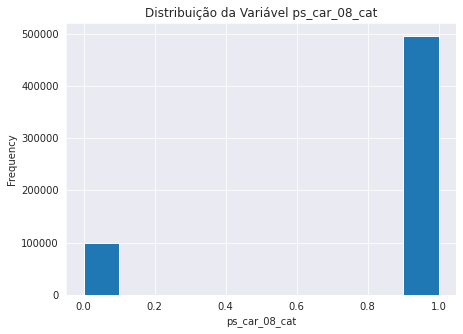

In [224]:
df_data['ps_car_08_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_08_cat')
plt.xlabel('ps_car_08_cat')
plt.show()

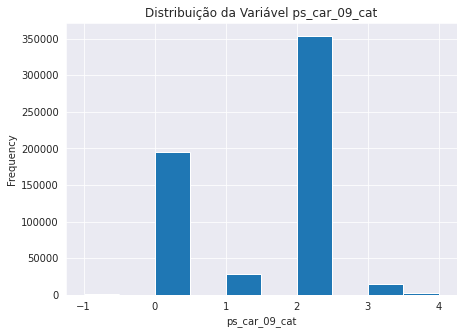

In [225]:
df_data['ps_car_09_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_09_cat')
plt.xlabel('ps_car_09_cat')
plt.show()

Novamente outra coluna que deve sofrer uma modificação substituindo os valores -1 pelo valor mais frequente. 

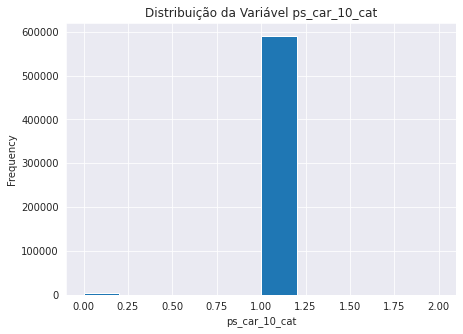

In [226]:
df_data['ps_car_10_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_10_cat')
plt.xlabel('ps_car_10_cat')
plt.show()

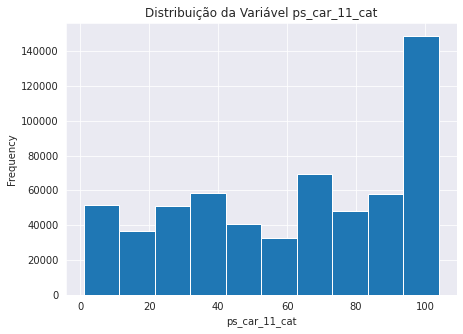

In [227]:
df_data['ps_car_11_cat'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_11_cat')
plt.xlabel('ps_car_11_cat')
plt.show()

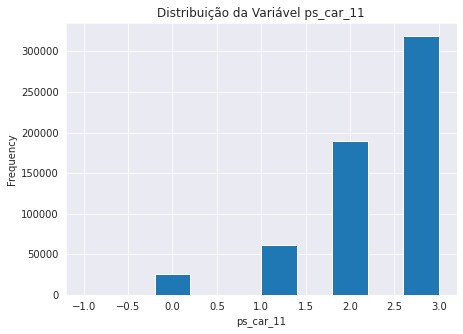

In [228]:
df_data['ps_car_11'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_11')
plt.xlabel('ps_car_11')
plt.show()

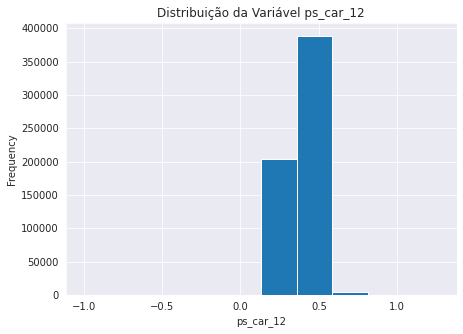

In [229]:
df_data['ps_car_12'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_12')
plt.xlabel('ps_car_12')
plt.show()

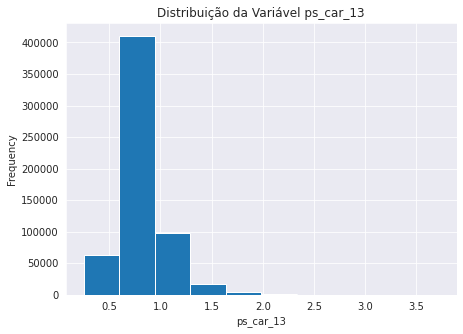

In [230]:
df_data['ps_car_13'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_13')
plt.xlabel('ps_car_13')
plt.show()

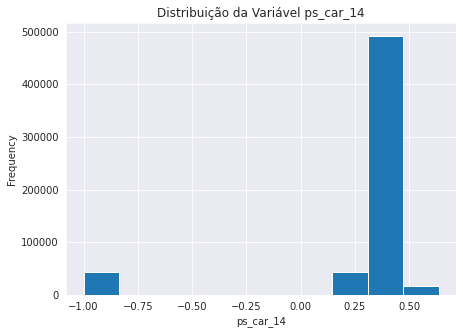

In [231]:
df_data['ps_car_14'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_14')
plt.xlabel('ps_car_14')
plt.show()

Outra coluna com valores que devem ser substituidos por valores mais frequentes. 

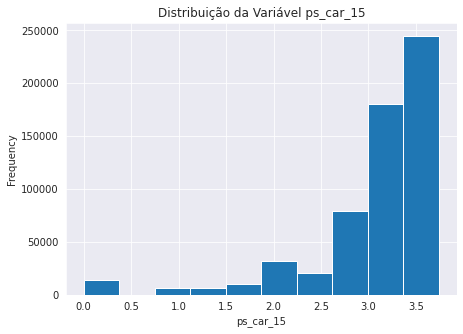

In [232]:
df_data['ps_car_15'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_car_15')
plt.xlabel('ps_car_15')
plt.show()

**Análise das variáveis calc_**


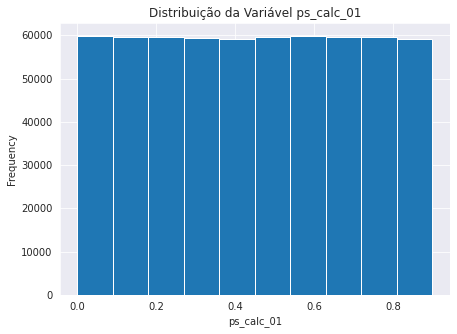

In [233]:
df_data['ps_calc_01'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_01')
plt.xlabel('ps_calc_01')
plt.show()

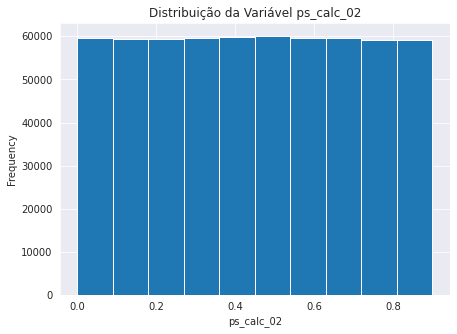

In [234]:
df_data['ps_calc_02'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_02')
plt.xlabel('ps_calc_02')
plt.show()

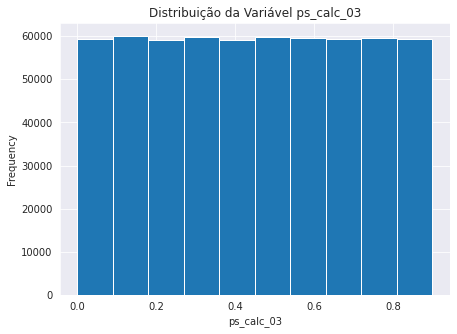

In [235]:
df_data['ps_calc_03'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_03')
plt.xlabel('ps_calc_03')
plt.show()

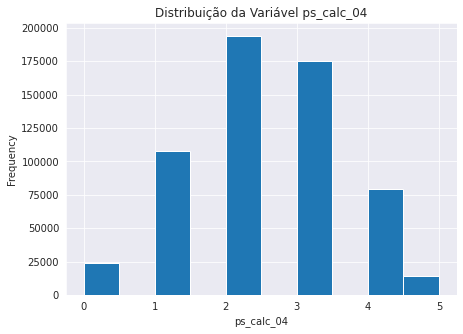

In [236]:
df_data['ps_calc_04'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_04')
plt.xlabel('ps_calc_04')
plt.show()

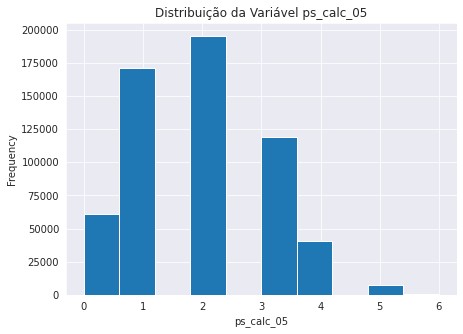

In [237]:
df_data['ps_calc_05'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_05')
plt.xlabel('ps_calc_05')
plt.show()

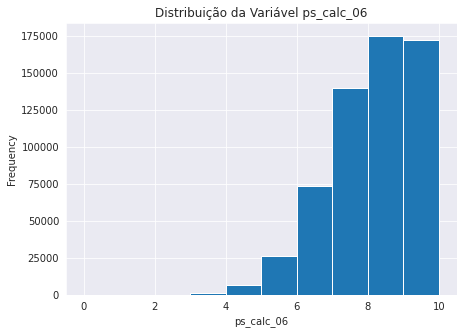

In [238]:
df_data['ps_calc_06'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_06')
plt.xlabel('ps_calc_06')
plt.show()

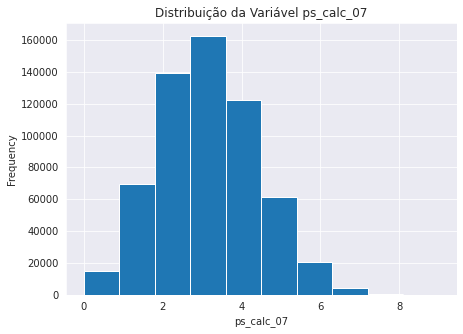

In [239]:
df_data['ps_calc_07'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_07')
plt.xlabel('ps_calc_07')
plt.show()

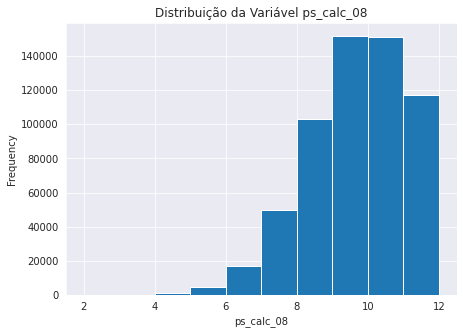

In [240]:
df_data['ps_calc_08'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_08')
plt.xlabel('ps_calc_08')
plt.show()

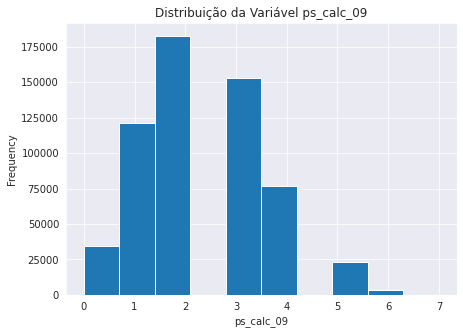

In [241]:
df_data['ps_calc_09'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_09')
plt.xlabel('ps_calc_09')
plt.show()

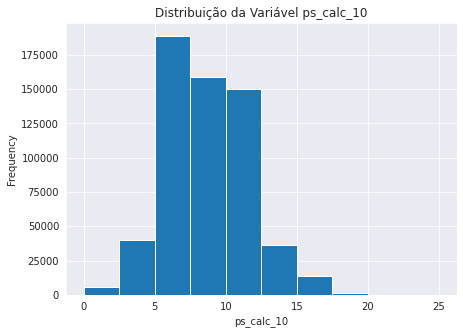

In [242]:
df_data['ps_calc_10'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_10')
plt.xlabel('ps_calc_10')
plt.show()

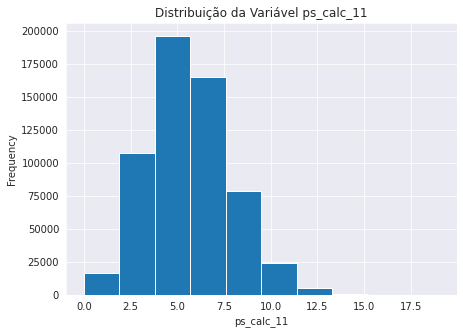

In [243]:
df_data['ps_calc_11'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_11')
plt.xlabel('ps_calc_11')
plt.show()

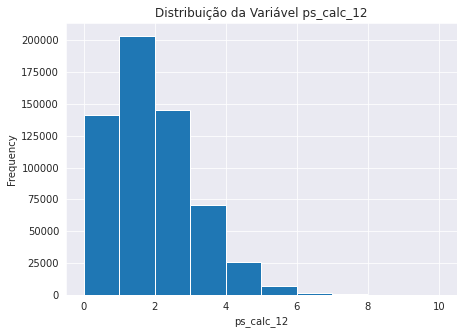

In [244]:
df_data['ps_calc_12'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_12')
plt.xlabel('ps_calc_12')
plt.show()

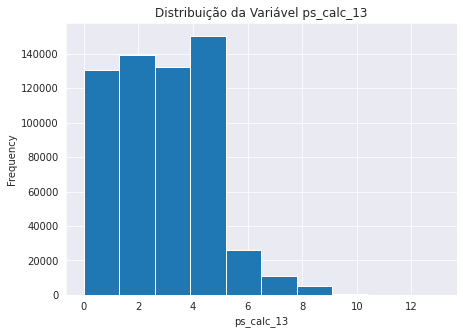

In [245]:
df_data['ps_calc_13'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_13')
plt.xlabel('ps_calc_13')
plt.show()

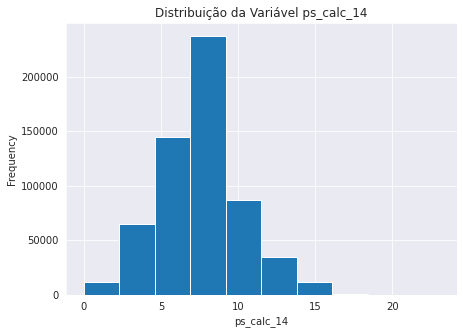

In [246]:
df_data['ps_calc_14'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_14')
plt.xlabel('ps_calc_14')
plt.show()

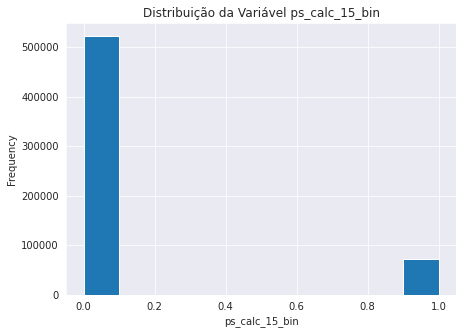

In [247]:
df_data['ps_calc_15_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_15_bin')
plt.xlabel('ps_calc_15_bin')
plt.show()

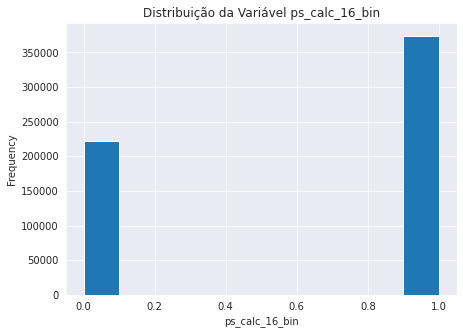

In [248]:
df_data['ps_calc_16_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_16_bin')
plt.xlabel('ps_calc_16_bin')
plt.show()

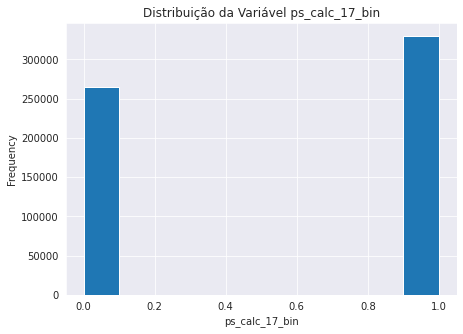

In [249]:
df_data['ps_calc_17_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_17_bin')
plt.xlabel('ps_calc_17_bin')
plt.show()

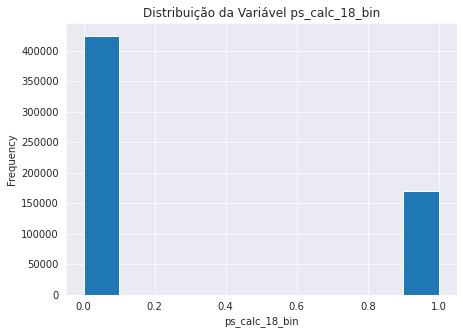

In [250]:
df_data['ps_calc_18_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_18_bin')
plt.xlabel('ps_calc_18_bin')
plt.show()

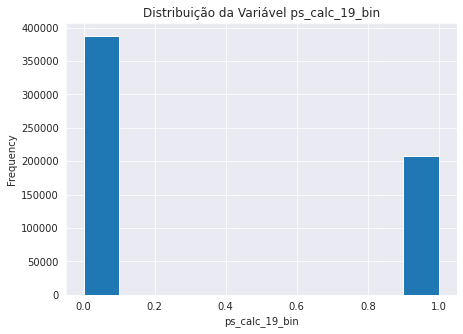

In [251]:
df_data['ps_calc_19_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_19_bin')
plt.xlabel('ps_calc_19_bin')
plt.show()

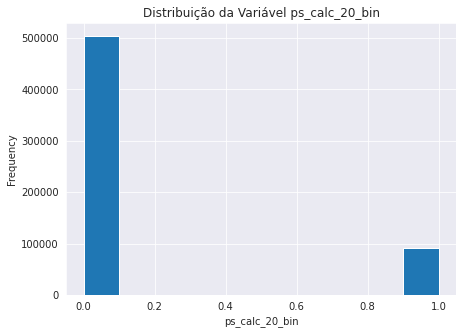

In [252]:
df_data['ps_calc_20_bin'].plot(kind='hist',
                       figsize=(7,5)
                       )

plt.title('Distribuição da Variável ps_calc_20_bin')
plt.xlabel('ps_calc_20_bin')
plt.show()

**Tratamento dos dados faltantes**

In [253]:
#dropando as duas colunas com a maior frequência de dados faltantes
df_data.drop('ps_car_05_cat', axis=1, inplace=True)
df_data.drop('ps_car_03_cat', axis=1, inplace=True)

Coluna ps_car_14

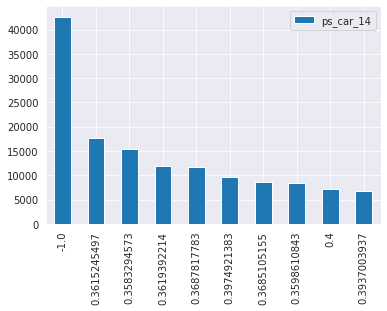

In [254]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_car_14'].value_counts().to_frame().head(10).plot(kind='bar')


In [255]:
#porcentagem de números faltantes da coluna ps_car_14
print('A porcentagem de dados faltantes da coluna é: {0:.2f}%'.format(len(df_data[df_data['ps_car_14'] == -1])/len(df_data['ps_car_14'])*100))

A porcentagem de dados faltantes da coluna é: 7.16%


In [256]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pela média
df_data_sem_dados_faltantes = df_data.query('ps_car_14 != -1')
df_data['ps_car_14'] = df_data['ps_car_14'].replace(-1, df_data_sem_dados_faltantes['ps_car_14'].mean())

Coluna ps_car_12

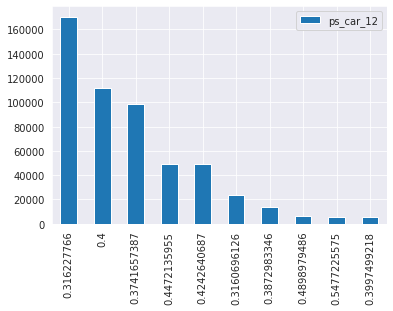

In [257]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_car_12'].value_counts().to_frame().head(10).plot(kind='bar')

In [258]:
#porcentagem de números faltantes da coluna ps_car_12
print('A porcentagem de dados faltantes da coluna é: {0:.5f}%'.format(len(df_data[df_data['ps_car_12'] == -1])/len(df_data['ps_car_12'])*100))

A porcentagem de dados faltantes da coluna é: 0.00017%


In [259]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pela média
df_data_sem_dados_faltantes = df_data.query('ps_car_12 != -1')
df_data['ps_car_12'] = df_data['ps_car_12'].replace(-1, df_data_sem_dados_faltantes['ps_car_12'].mean())

Colunas ps_car_11

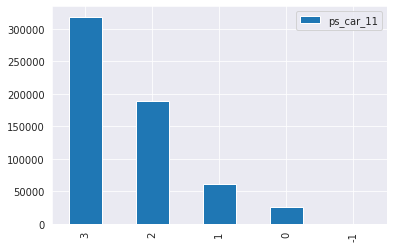

In [260]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_car_11'].value_counts().to_frame().head(10).plot(kind='bar')

In [261]:
#porcentagem de números faltantes da coluna ps_car_11
print('A porcentagem de dados faltantes da coluna é: {0:.5f}%'.format(len(df_data[df_data['ps_car_11'] == -1])/len(df_data['ps_car_11'])*100))

A porcentagem de dados faltantes da coluna é: 0.00084%


In [262]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pela média
df_data_sem_dados_faltantes = df_data.query('ps_car_11 != -1')
df_data['ps_car_11'] = df_data['ps_car_11'].replace(-1, df_data_sem_dados_faltantes['ps_car_11'].mean())

Coluna ps_reg_03

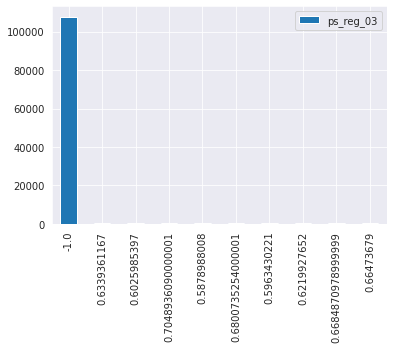

In [263]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_reg_03'].value_counts().to_frame().head(10).plot(kind='bar')

In [264]:
#porcentagem de números faltantes da coluna ps_reg_03
print('A porcentagem de dados faltantes da coluna é: {0:.5f}%'.format(len(df_data[df_data['ps_reg_03'] == -1])/len(df_data['ps_reg_03'])*100))

A porcentagem de dados faltantes da coluna é: 18.10649%


In [265]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pela média
df_data_sem_dados_faltantes = df_data.query('ps_reg_03 != -1')
df_data['ps_reg_03'] = df_data['ps_reg_03'].replace(-1, df_data_sem_dados_faltantes['ps_reg_03'].mean())

Coluna ps_car_09_cat

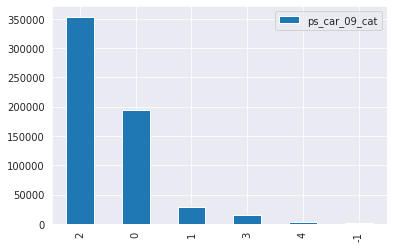

In [266]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_car_09_cat'].value_counts().to_frame().head(10).plot(kind='bar')

In [267]:
#porcentagem de números faltantes da coluna ps_car_09_cat
print('A porcentagem de dados faltantes da coluna é: {0:.3f}%'.format(len(df_data[df_data['ps_car_09_cat'] == -1])/len(df_data['ps_car_09_cat'])*100))

A porcentagem de dados faltantes da coluna é: 0.096%


In [268]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pelo valor mais frequente
df_data['ps_car_09_cat'] = df_data['ps_car_09_cat'].replace(-1, 2.0)

Coluna ps_car_07_cat

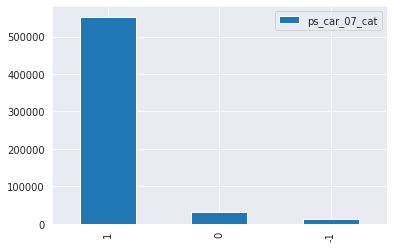

In [269]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_car_07_cat'].value_counts().to_frame().head(10).plot(kind='bar')

In [270]:
#porcentagem de números faltantes da coluna ps_car_07_cat
print('A porcentagem de dados faltantes da coluna é: {0:.3f}%'.format(len(df_data[df_data['ps_car_07_cat'] == -1])/len(df_data['ps_car_07_cat'])*100))

A porcentagem de dados faltantes da coluna é: 1.930%


In [271]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pelo valor mais frequente
df_data['ps_car_07_cat'] = df_data['ps_car_07_cat'].replace(-1, 1)

Coluna ps_car_02_cat

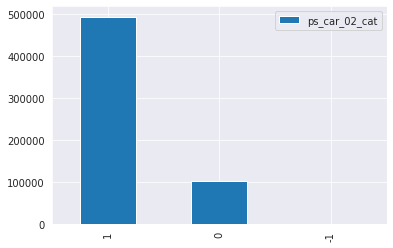

In [272]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_car_02_cat'].value_counts().to_frame().head(10).plot(kind='bar')

In [273]:
#porcentagem de números faltantes da coluna ps_car_02_cat
print('A porcentagem de dados faltantes da coluna é: {0:.3f}%'.format(len(df_data[df_data['ps_car_02_cat'] == -1])/len(df_data['ps_car_02_cat'])*100))

A porcentagem de dados faltantes da coluna é: 0.001%


In [274]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pelo valor mais frequente
df_data['ps_car_02_cat'] = df_data['ps_car_02_cat'].replace(-1, 1)

Coluna ps_ind_05_cat

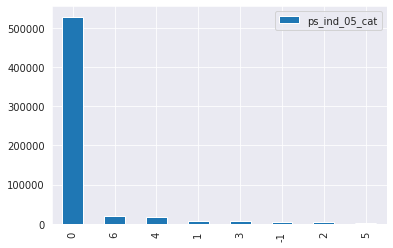

In [275]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_ind_05_cat'].value_counts().to_frame().head(10).plot(kind='bar')

In [276]:
#porcentagem de números faltantes da coluna ps_ind_05_cat
print('A porcentagem de dados faltantes da coluna é: {0:.3f}%'.format(len(df_data[df_data['ps_ind_05_cat'] == -1])/len(df_data['ps_ind_05_cat'])*100))

A porcentagem de dados faltantes da coluna é: 0.976%


In [277]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pelo valor mais frequente
df_data['ps_ind_05_cat'] = df_data['ps_ind_05_cat'].replace(-1, 0)

Coluna ps_ind_04_cat

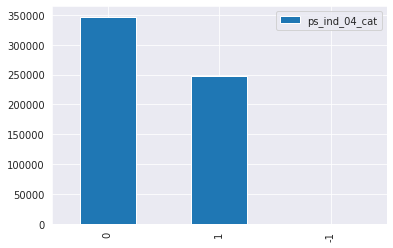

In [278]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_ind_04_cat'].value_counts().to_frame().head(10).plot(kind='bar')

In [279]:
#porcentagem de números faltantes da coluna ps_ind_04_cat
print('A porcentagem de dados faltantes da coluna é: {0:.3f}%'.format(len(df_data[df_data['ps_ind_04_cat'] == -1])/len(df_data['ps_ind_04_cat'])*100))

A porcentagem de dados faltantes da coluna é: 0.014%


In [280]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pelo valor mais frequente
df_data['ps_ind_04_cat'] = df_data['ps_ind_04_cat'].replace(-1, 0)

Coluna ps_ind_02_cat

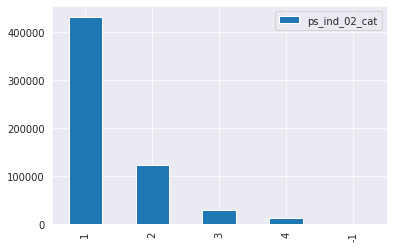

In [281]:
#substituindo os dados faltantes pelo valor mais frequente
df_data['ps_ind_02_cat'].value_counts().to_frame().head(10).plot(kind='bar')

In [282]:
#porcentagem de números faltantes da coluna ps_ind_02_cat
print('A porcentagem de dados faltantes da coluna é: {0:.3f}%'.format(len(df_data[df_data['ps_ind_02_cat'] == -1])/len(df_data['ps_ind_02_cat'])*100))

A porcentagem de dados faltantes da coluna é: 0.036%


In [283]:
#Como a quantidade de dados faltantes é menor que 20%
#Os valores irão ser substituidos pelo valor mais frequente
df_data['ps_ind_02_cat'] = df_data['ps_ind_02_cat'].replace(-1, 1)

**Análise de correlação entre variáveis do mesmo tipo**

In [284]:
#variável do tipo ind 
df_data_ind = df_data.iloc[:, 1:20]

In [285]:
df_data_ind.corr()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin
target,1.000000,0.018570,0.005413,0.008360,0.009910,0.031124,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555
ps_ind_01,0.018570,1.000000,-0.001898,0.223408,0.066683,0.011421,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226
ps_ind_02_cat,0.005413,-0.001898,1.000000,-0.061616,0.146366,-0.009975,-0.126091,0.016336,0.031159,0.110492,-0.000767,0.000728,-0.004523,-0.000894,-0.003526,-0.004360,0.011943,-0.018585,-0.000307
ps_ind_03,0.008360,0.223408,-0.061616,1.000000,-0.096333,0.042325,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316
ps_ind_04_cat,0.009910,0.066683,0.146366,-0.096333,1.000000,0.012587,-0.297989,0.305099,0.045116,-0.011425,0.000784,0.001007,-0.001139,-0.000792,-0.000612,0.077003,0.017291,0.008074,-0.025809
ps_ind_05_cat,0.031124,0.011421,-0.009975,0.042325,0.012587,1.000000,0.010441,-0.010359,0.004384,-0.005655,0.001870,0.000309,-0.000364,0.001949,0.000576,0.011252,0.004279,0.007764,-0.008578
ps_ind_06_bin,-0.034017,-0.277458,-0.126091,-0.045158,-0.297989,0.010441,1.000000,-0.474009,-0.356838,-0.384345,-0.008978,-0.005229,-0.017499,-0.008390,-0.018334,0.016406,0.028352,-0.037121,-0.011751
ps_ind_07_bin,0.034218,0.005700,0.016336,-0.060368,0.305099,-0.010359,-0.474009,1.000000,-0.260438,-0.280513,0.010740,0.010119,0.036619,0.012125,0.035573,-0.120729,-0.072321,0.020776,0.076562
ps_ind_08_bin,0.013147,0.188583,0.031159,0.014037,0.045116,0.004384,-0.356838,-0.260438,1.000000,-0.211173,0.006489,0.010041,0.012254,0.007898,0.015413,0.052776,0.005855,0.036036,-0.033273
ps_ind_09_bin,-0.008237,0.162800,0.110492,0.111306,-0.011425,-0.005655,-0.384345,-0.280513,-0.211173,1.000000,-0.006973,-0.014372,-0.030858,-0.010612,-0.031640,0.064870,0.040109,-0.011023,-0.039631


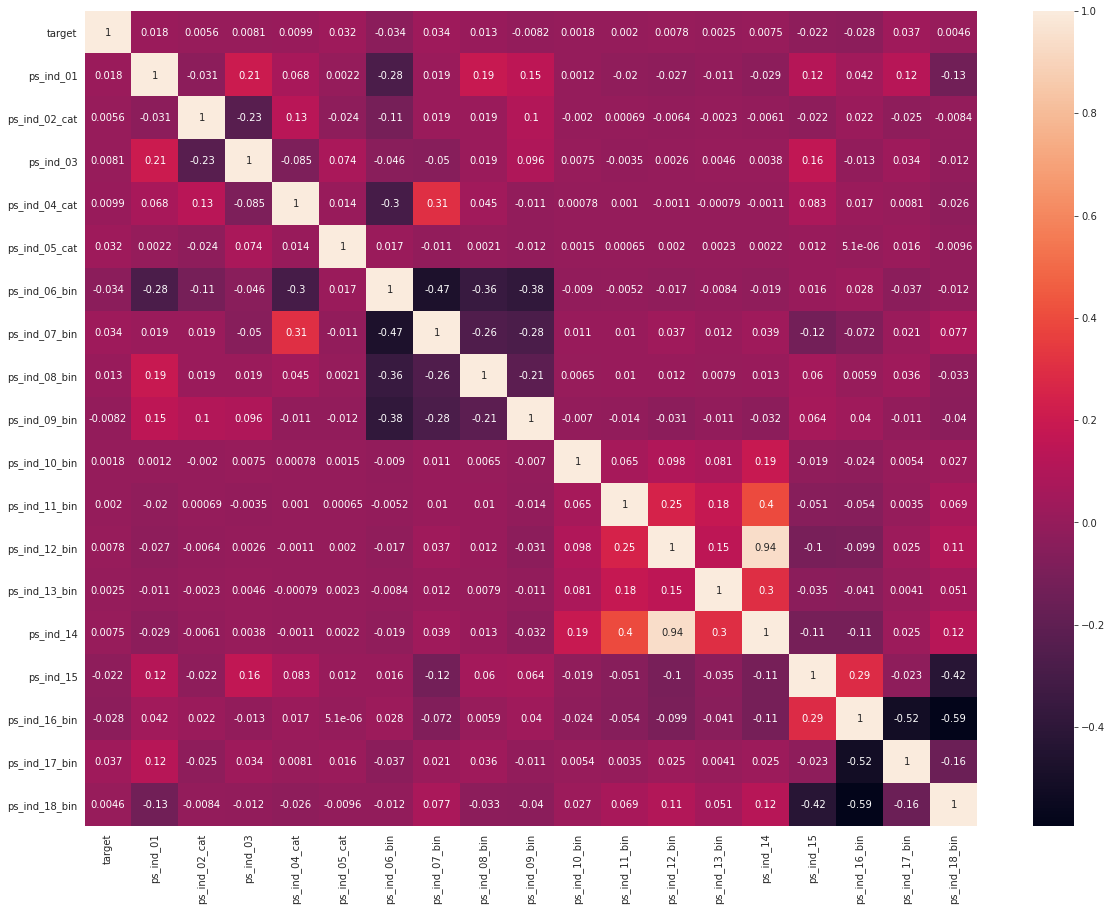

In [286]:
#gráfico de calor com as variáveis ind 
#o coeficiente escolhido foi o spearman que descreve as relações monotônica
#esse coeficiente é mais apropriado para tratar dados ordinais
plt.figure(figsize=(20,15))
sns.heatmap(df_data_ind.corr("spearman"), annot=True)

Entre as variáveis do tipo ind, existem fortes colinearidades entre algumas variáveis.

As colunas são as seguintes: 
* ps_ind_14 e ps_ind_12_bin com 0.94;
* ps_ind_14 e ps_ind_11_bin com 0.40;
* ps_ind_14 e ps_ind_13_bin com 0.30;

Caso aja um tratamento de seleção de variáveis uma opção é escolher manter a coluna ps_ind_14. 

* ps_ind_06_bin e ps_ind_07_bin com -0.47;
* ps_ind_06_bin e ps_ind_08_bin com -0.36;
* ps_ind_06_bin e ps_ind_09_bin com -0.38;

As quatro colunas acima tem uma colinearidade moderada e caso aja tratamento a opção é manter a variável ps_ind_06_bin.

* ps_ind_18_bin e ps_ind_15 com -0.42;
* ps_ind_18_bin e ps_ind_16_bin com -0.59;
* ps_ind_16_bin e ps_ind_17_bin com -0.52;
* ps_ind_16_bin e ps_ind_15 com 0.29;

Nessa relação existe variáveis com forte e baixa colinearidade, mas podemos selecionar a variável ps_ind_18 e ps_ind_17_bin;

A última correlação tem um baixo valor de correlação. 

* ps_ind_04_cat e ps_ind_07_bin com 0.31;



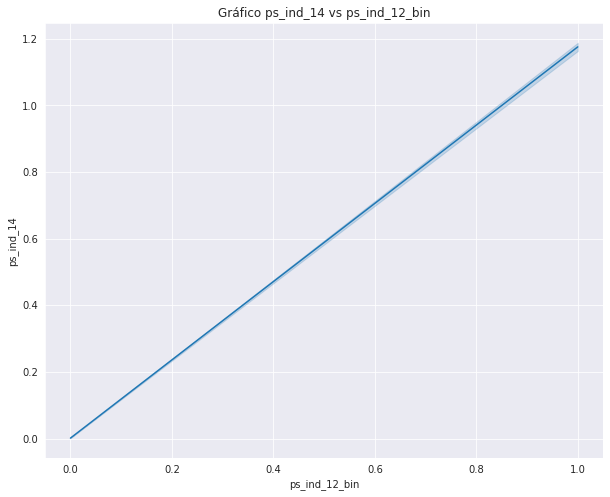

In [287]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_12_bin', y='ps_ind_14',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_14 vs ps_ind_12_bin')
plt.show()

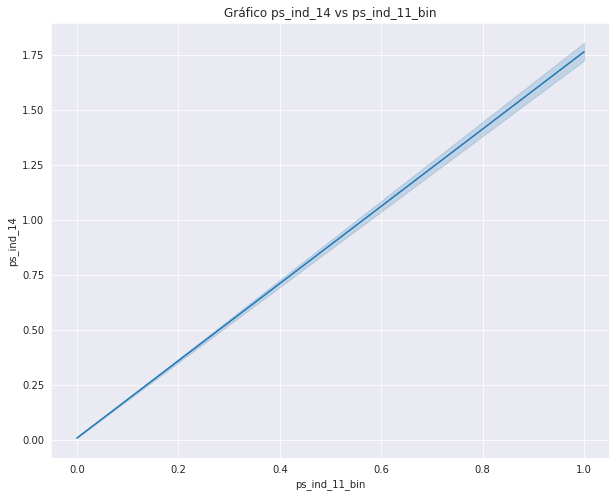

In [288]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_11_bin', y='ps_ind_14',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_14 vs ps_ind_11_bin')
plt.show()

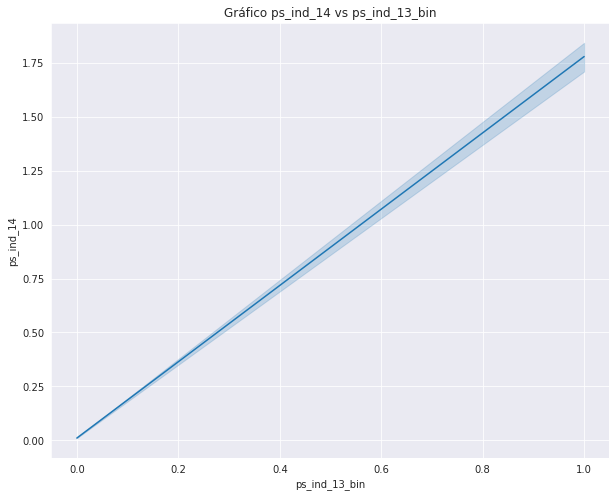

In [289]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_13_bin', y='ps_ind_14',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_14 vs ps_ind_13_bin')
plt.show()

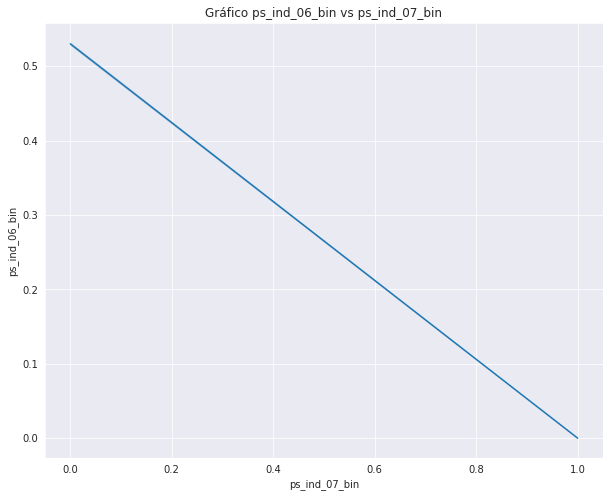

In [290]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_07_bin', y='ps_ind_06_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_06_bin vs ps_ind_07_bin')
plt.show()

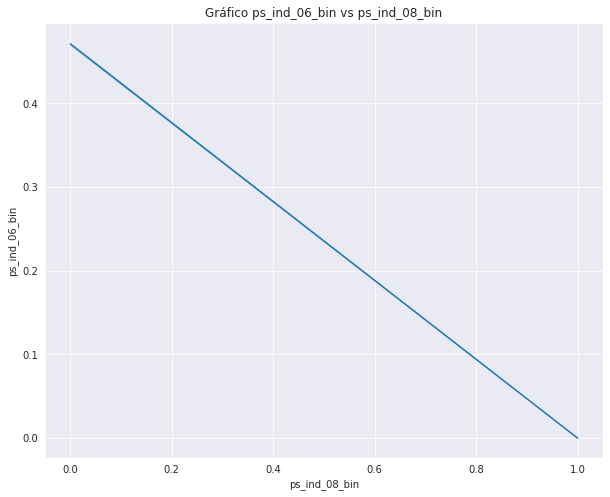

In [291]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_08_bin', y='ps_ind_06_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_06_bin vs ps_ind_08_bin')
plt.show()

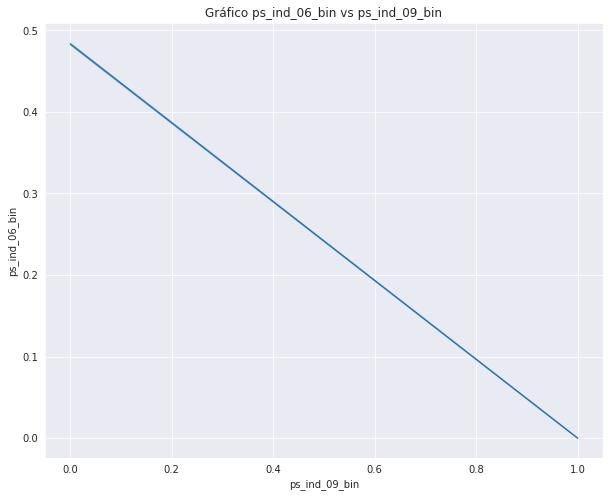

In [292]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_09_bin', y='ps_ind_06_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_06_bin vs ps_ind_09_bin')
plt.show()

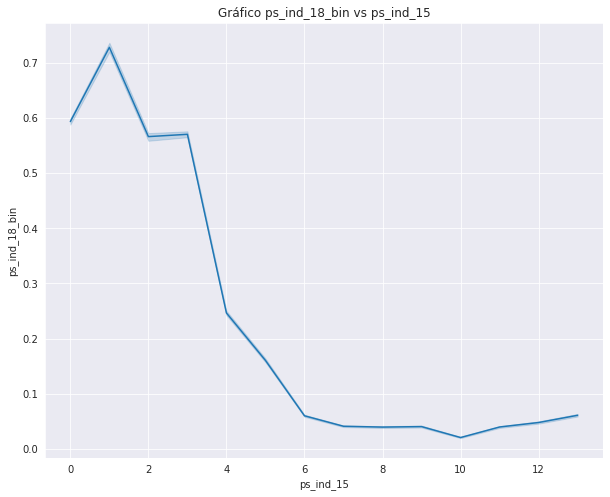

In [293]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_15', y='ps_ind_18_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_18_bin vs ps_ind_15')
plt.show()

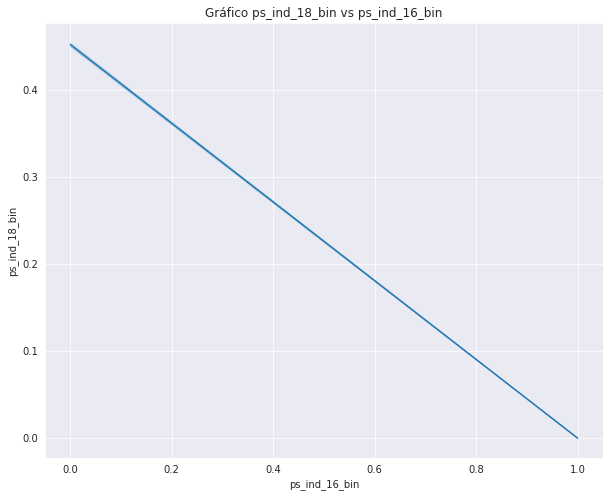

In [294]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_16_bin', y='ps_ind_18_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_18_bin vs ps_ind_16_bin')
plt.show()

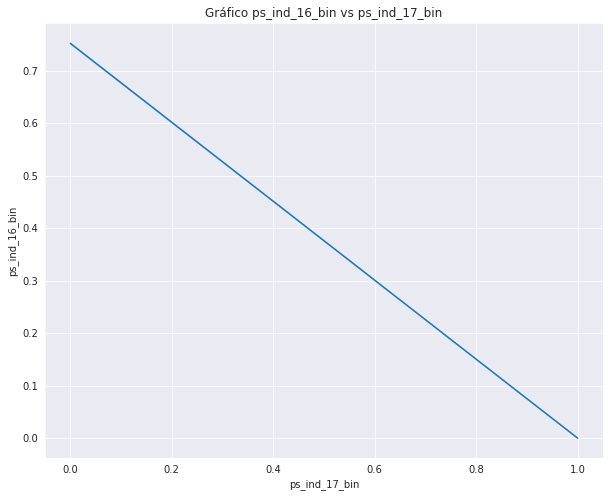

In [295]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_17_bin', y='ps_ind_16_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_16_bin vs ps_ind_17_bin')
plt.show()

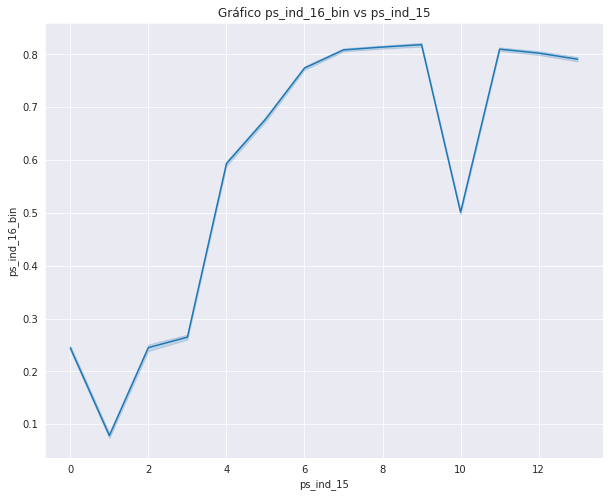

In [296]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_15', y='ps_ind_16_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_16_bin vs ps_ind_15')
plt.show()

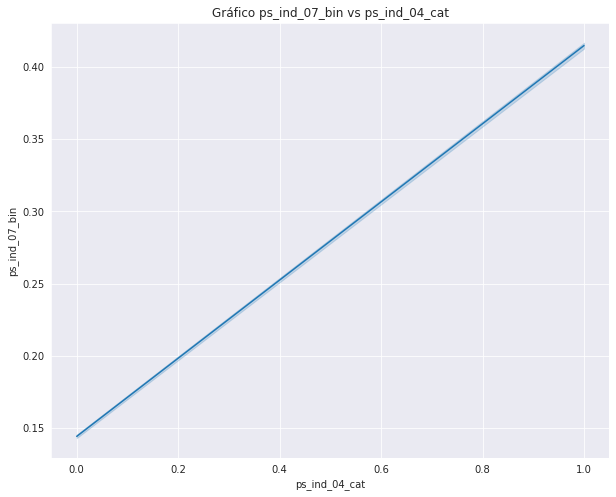

In [297]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_ind_04_cat', y='ps_ind_07_bin',
                data=df_data_ind
                )

plt.title('Gráfico ps_ind_07_bin vs ps_ind_04_cat')
plt.show()



In [298]:
#variável do tipo reg
df_data_reg = df_data.iloc[:, 20:23]

In [299]:
df_data_reg.corr()

,ps_reg_01,ps_reg_02,ps_reg_03
ps_reg_01,1.000000,0.471027,0.135876
ps_reg_02,0.471027,1.000000,0.703121
ps_reg_03,0.135876,0.703121,1.000000


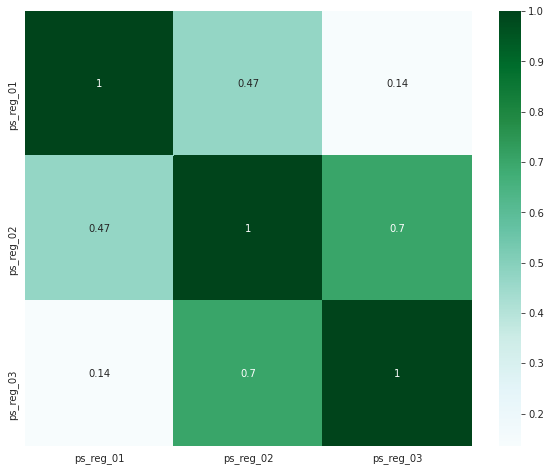

In [300]:
plt.figure(figsize=(10,8))
sns.heatmap(df_data_reg.corr(), annot=True, cmap='BuGn')

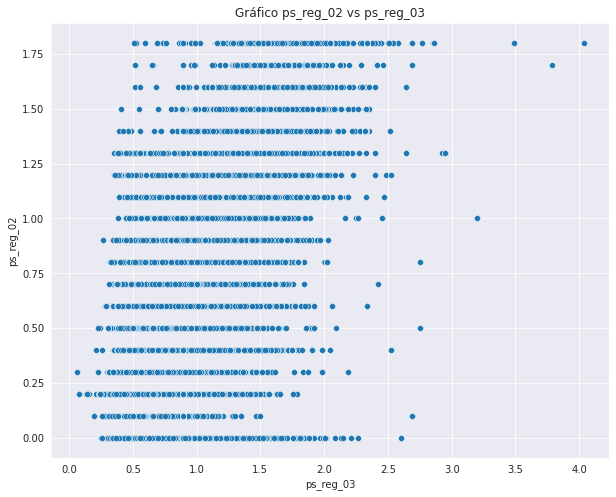

In [301]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='ps_reg_03', 
                y='ps_reg_02',
                data=df_data_reg
                )

plt.title('Gráfico ps_reg_02 vs ps_reg_03')
plt.show()


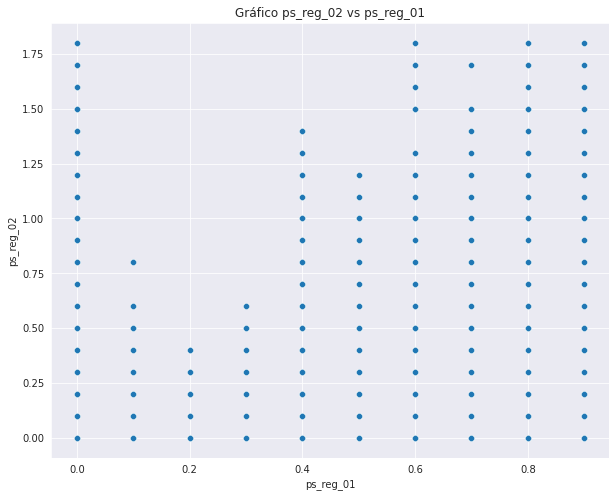

In [302]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='ps_reg_01', 
                y='ps_reg_02',
                data=df_data_reg
                )

plt.title('Gráfico ps_reg_02 vs ps_reg_01')
plt.show()


In [303]:
#variável do tipo car
df_data_car = df_data.iloc[:, 23:37]

In [304]:
df_data_car.corr()

,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
ps_car_01_cat,1.000000,-0.152742,0.067732,0.053326,0.079102,-0.059548,0.273029,0.006355,0.010498,0.110921,0.126025,0.167127,-0.002832,0.102683
ps_car_02_cat,-0.152742,1.000000,-0.273611,-0.253097,-0.016356,0.036067,-0.014101,-0.019184,-0.000920,-0.090151,-0.469478,-0.482972,-0.255666,-0.076331
ps_car_04_cat,0.067732,-0.273611,1.000000,0.194015,-0.042984,-0.051066,-0.037441,0.000721,0.070446,-0.057216,0.570431,0.595173,0.493434,0.084374
ps_car_06_cat,0.053326,-0.253097,0.194015,1.000000,0.014146,-0.014612,0.003572,-0.003221,0.025385,-0.030762,0.273649,0.205263,0.163511,-0.017954
ps_car_07_cat,0.079102,-0.016356,-0.042984,0.014146,1.000000,-0.004971,0.004245,0.015995,-0.032874,0.114077,-0.021423,0.002341,-0.040030,-0.001753
ps_car_08_cat,-0.059548,0.036067,-0.051066,-0.014612,-0.004971,1.000000,-0.017229,-0.031252,0.034365,-0.038511,-0.031646,-0.370009,0.070008,-0.374266
ps_car_09_cat,0.273029,-0.014101,-0.037441,0.003572,0.004245,-0.017229,1.000000,-0.023798,-0.010769,0.119412,-0.031589,-0.055574,-0.215937,-0.048851
ps_car_10_cat,0.006355,-0.019184,0.000721,-0.003221,0.015995,-0.031252,-0.023798,1.000000,0.003493,0.013417,-0.018063,0.034532,-0.007624,0.052841
ps_car_11_cat,0.010498,-0.000920,0.070446,0.025385,-0.032874,0.034365,-0.010769,0.003493,1.000000,-0.049747,0.038687,0.048606,0.018729,-0.043881
ps_car_11,0.110921,-0.090151,-0.057216,-0.030762,0.114077,-0.038511,0.119412,0.013417,-0.049747,1.000000,0.057017,0.101883,-0.038780,0.109680


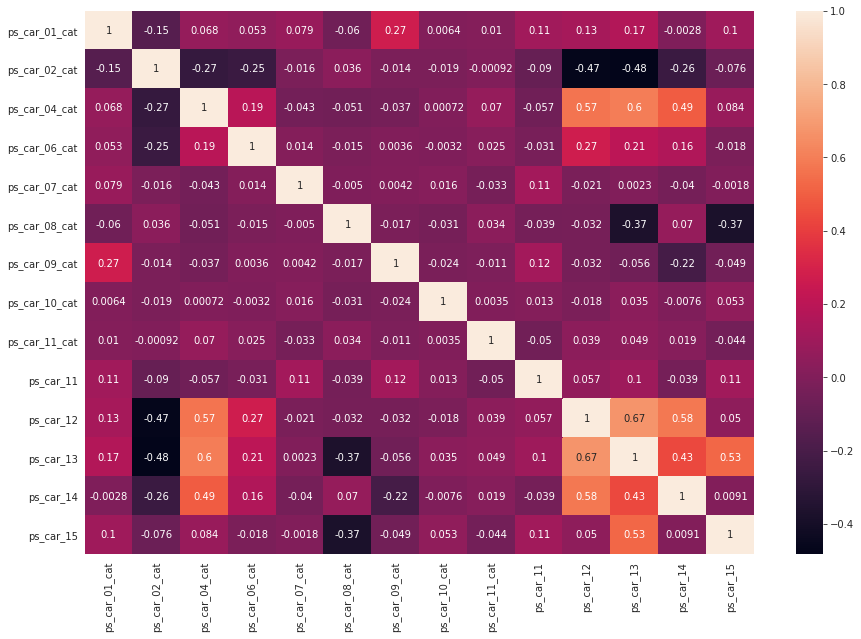

In [305]:
plt.figure(figsize=(15,10))
sns.heatmap(df_data_car.corr(), annot=True)

Entre as variáveis do tipo car, existem fortes colinearidades entre algumas variáveis.

* ps_car_12 e ps_car_02_cat com -0.47;
* ps_car_12 e ps_car_04_cat com 0.57;
* ps_car_12 e ps_car_13 com 0.67;
* ps_car_12 e ps_car_14 com 0.58;

Caso aja um tratamento de seleção de variáveis, uma opção é escolher manter a coluna ps_ind_12. 

* ps_car_13 e ps_car_02_cat com -0.48;
* ps_car_13 e ps_car_04_cat com 0.60;
* ps_car_13 e ps_car_08_cat com -0.37;
* ps_car_13 e ps_car_14 com 0.43;
* ps_car_13 e ps_car_15 com 0.53;

Porém quando analisamos na pespectiva da coluna ps_car_13, temos que a opção é selecionar essa coluna ao invês da ps_car_12.

E existe colinearidade nas colunas abaixo.

* ps_car_14 e ps_car_04_cat com 0.49; 
* ps_car_15 e ps_car_08_cat com -0.37;


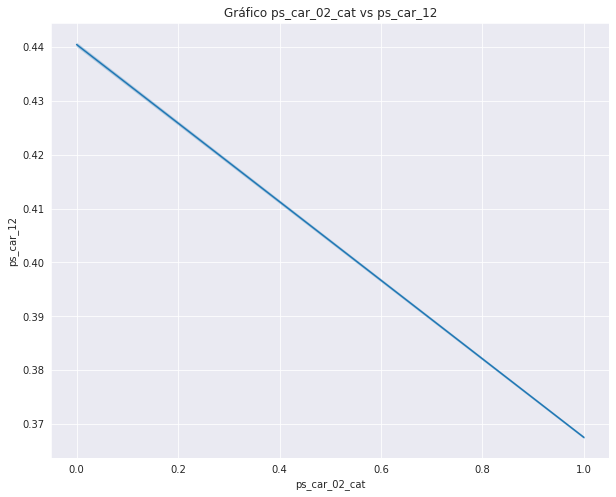

In [306]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_car_02_cat', y='ps_car_12',
                data=df_data_car
                )

plt.title('Gráfico ps_car_02_cat vs ps_car_12')
plt.show()

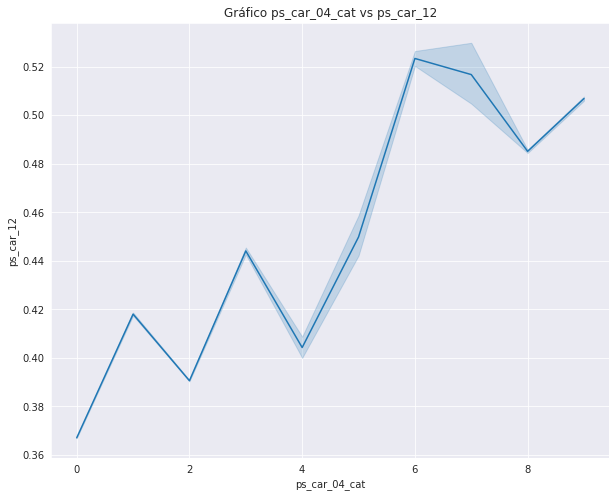

In [307]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_car_04_cat', y='ps_car_12',
                data=df_data_car
                )

plt.title('Gráfico ps_car_04_cat vs ps_car_12')
plt.show()

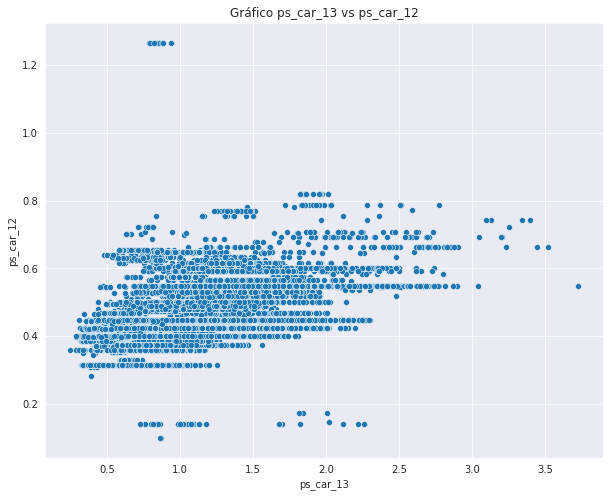

In [308]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='ps_car_13', y='ps_car_12',
                data=df_data_car
                )

plt.title('Gráfico ps_car_13 vs ps_car_12')
plt.show()

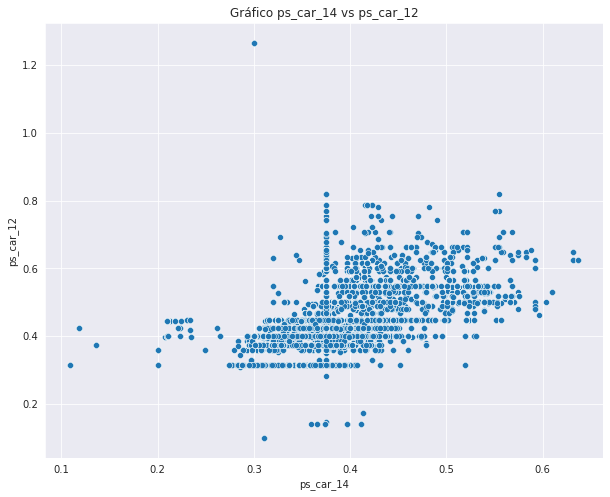

In [309]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='ps_car_14', y='ps_car_12',
                data=df_data_car
                )

plt.title('Gráfico ps_car_14 vs ps_car_12')
plt.show()

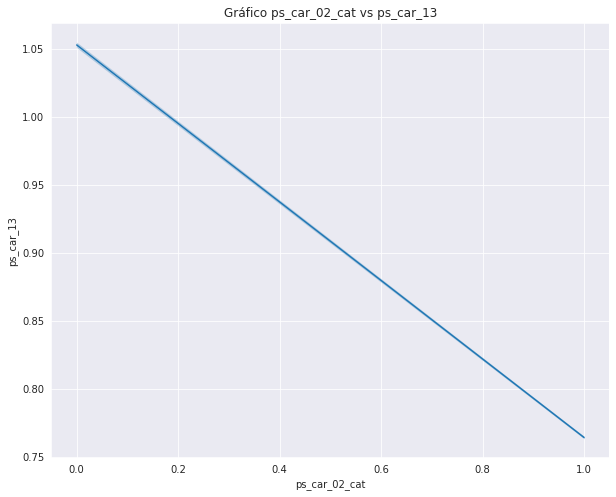

In [310]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_car_02_cat', y='ps_car_13',
                data=df_data_car
                )

plt.title('Gráfico ps_car_02_cat vs ps_car_13')
plt.show()

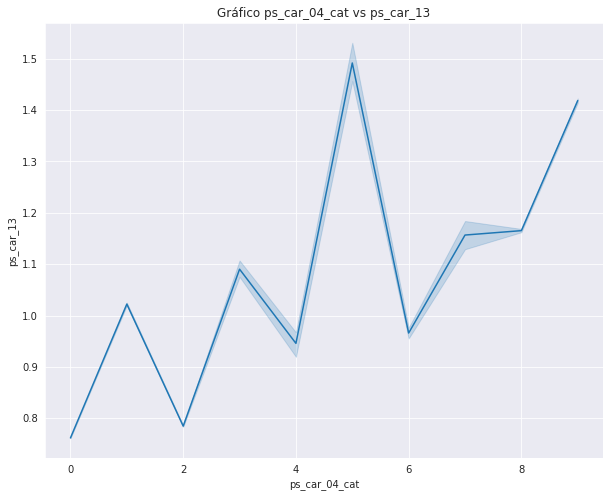

In [311]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_car_04_cat', y='ps_car_13',
                data=df_data_car
                )

plt.title('Gráfico ps_car_04_cat vs ps_car_13')
plt.show()

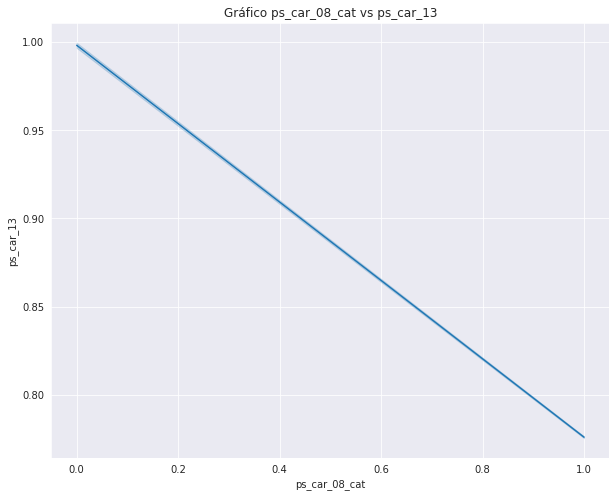

In [312]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_car_08_cat', y='ps_car_13',
                data=df_data_car
                )

plt.title('Gráfico ps_car_08_cat vs ps_car_13')
plt.show()

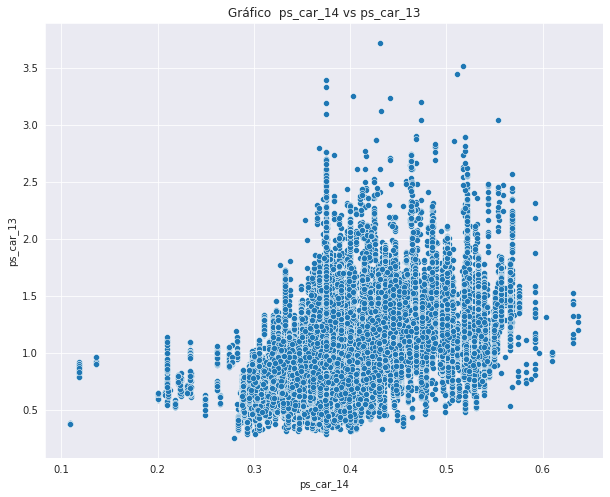

In [313]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='ps_car_14', y='ps_car_13',
                data=df_data_car
                )

plt.title('Gráfico  ps_car_14 vs ps_car_13')
plt.show()

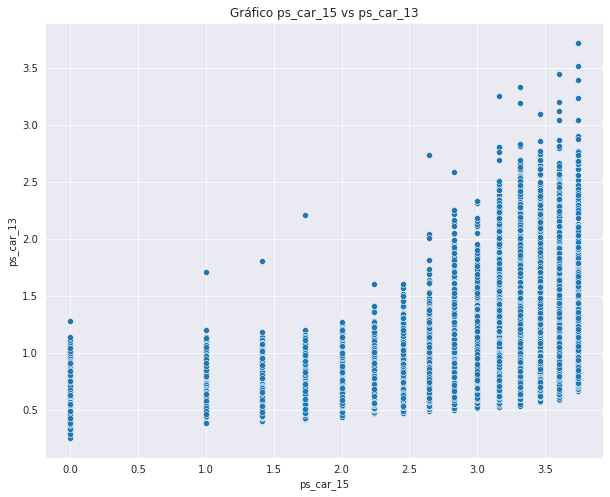

In [314]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='ps_car_15', y='ps_car_13',
                data=df_data_car
                )

plt.title('Gráfico ps_car_15 vs ps_car_13')
plt.show()

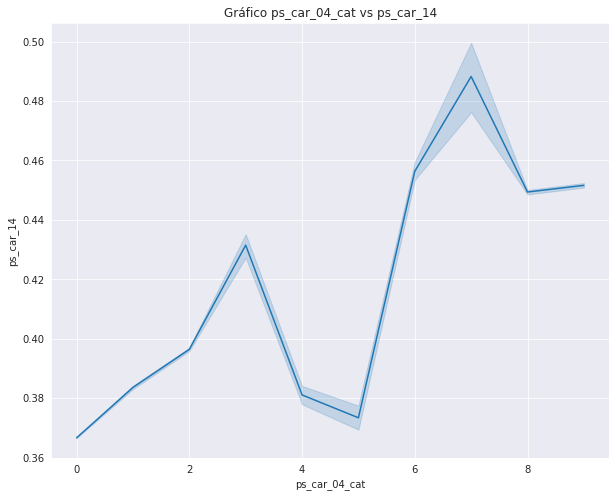

In [315]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_car_04_cat', y='ps_car_14',
                data=df_data_car
                )

plt.title('Gráfico ps_car_04_cat vs ps_car_14')
plt.show()

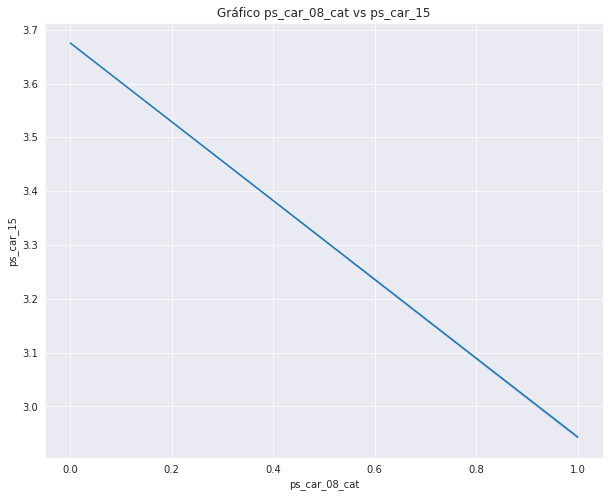

In [316]:
plt.figure(figsize=(10,8))
sns.lineplot(x='ps_car_08_cat', y='ps_car_15',
                data=df_data_car
                )

plt.title('Gráfico ps_car_08_cat vs ps_car_15')
plt.show()

In [317]:
#variável do tipo calc
df_data_calc = df_data.iloc[:, 37:57]


In [318]:
df_data_calc.corr()

,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
ps_calc_01,1.000000,-0.002418,0.000526,2.609165e-03,0.000552,-0.000231,0.000103,0.000293,-0.000989,-4.052781e-04,-0.001482,-0.002083,0.000155,0.000708,0.000488,0.000111,-0.000389,0.000457,-0.001304,0.001352
ps_calc_02,-0.002418,1.000000,0.002948,7.560473e-05,-0.001596,0.000706,0.001703,-0.000106,0.001204,-5.032048e-04,-0.000862,-0.000693,0.000809,0.000333,0.000035,0.001765,-0.000469,0.001247,0.000300,-0.001423
ps_calc_03,0.000526,0.002948,1.000000,-1.970514e-05,-0.001442,0.001040,0.002445,0.000372,-0.001190,1.813359e-04,-0.000379,0.000221,0.001550,-0.000520,0.001323,-0.000189,-0.001002,-0.001797,0.000524,-0.001326
ps_calc_04,0.002609,0.000076,-0.000020,1.000000e+00,0.000633,-0.001845,0.001445,-0.001847,-0.000038,5.835325e-08,0.000245,0.000978,-0.000215,0.001180,0.000172,-0.000874,0.001186,0.001109,0.000902,0.000146
ps_calc_05,0.000552,-0.001596,-0.001442,6.326671e-04,1.000000,-0.001394,-0.002212,-0.001792,0.001154,-2.358151e-04,0.000387,-0.000212,0.000270,-0.000969,0.000079,-0.000943,-0.000985,-0.000406,0.000265,0.001494
ps_calc_06,-0.000231,0.000706,0.001040,-1.845321e-03,-0.001394,1.000000,-0.000075,-0.000603,0.001710,-1.534410e-03,-0.000575,0.000607,0.000974,-0.000870,0.000631,0.000140,0.000320,0.002005,0.001185,0.000864
ps_calc_07,0.000103,0.001703,0.002445,1.445124e-03,-0.002212,-0.000075,1.000000,-0.002085,0.000756,-5.302752e-04,-0.000109,-0.000389,-0.000599,0.001908,0.000097,-0.001411,-0.000327,-0.000311,-0.001183,0.000394
ps_calc_08,0.000293,-0.000106,0.000372,-1.846555e-03,-0.001792,-0.000603,-0.002085,1.000000,0.000013,-2.665669e-03,0.002016,0.000109,-0.000304,-0.000171,-0.000266,0.002133,-0.000542,0.000202,0.000785,-0.000768
ps_calc_09,-0.000989,0.001204,-0.001190,-3.835483e-05,0.001154,0.001710,0.000756,0.000013,1.000000,-1.819156e-04,-0.000898,-0.001409,-0.000630,-0.000066,0.000923,-0.001291,-0.000814,-0.001094,0.000444,0.000067
ps_calc_10,-0.000405,-0.000503,0.000181,5.835325e-08,-0.000236,-0.001534,-0.000530,-0.002666,-0.000182,1.000000e+00,0.000394,0.002086,0.001279,0.001252,-0.000321,0.000422,0.000366,-0.001618,-0.001302,-0.000336


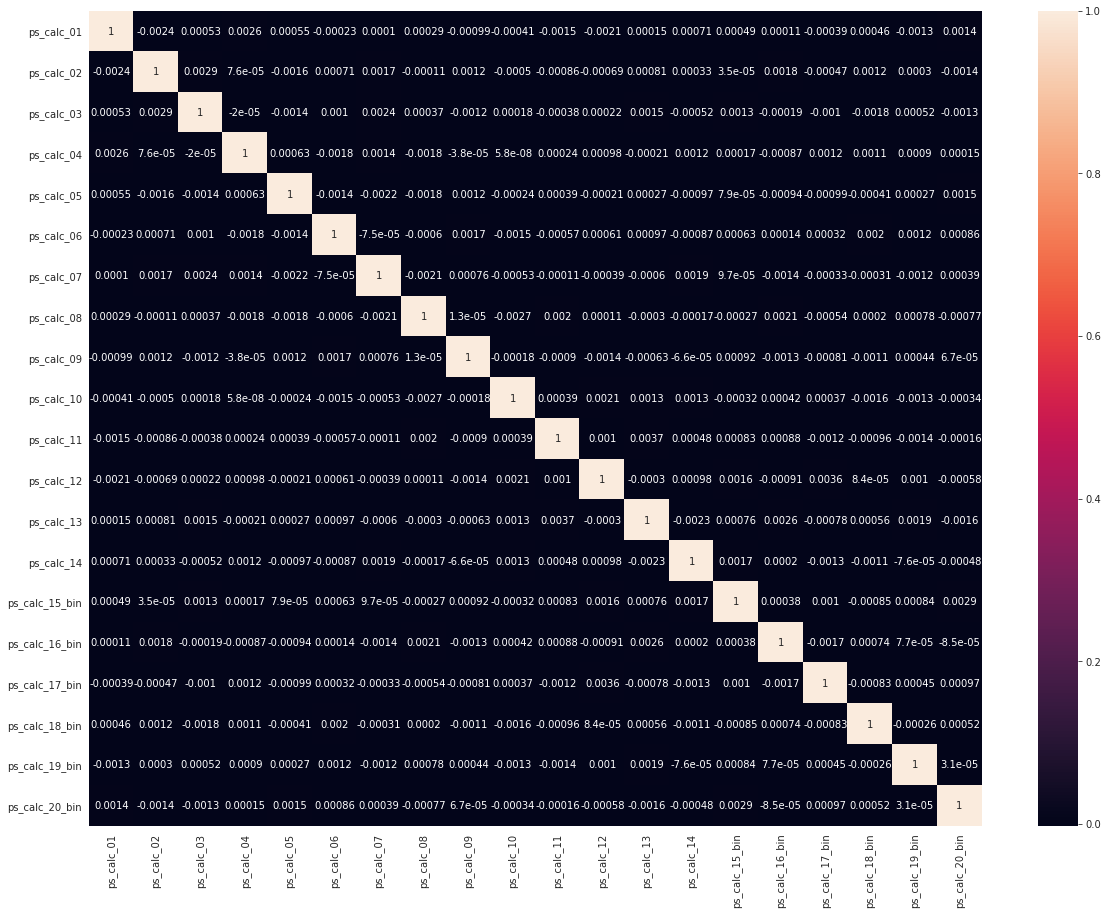

In [319]:
plt.figure(figsize=(20,15))
sns.heatmap(df_data_calc.corr(), annot=True)

De acordo com o mapa de calor para o tipo da variável calc não existem altas colinearidades. Logo, devemos retirar as variáveis calc do modelo.

### Baseline

In [320]:
#Importanto algumas bibliotecas 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [321]:
#Dropando as variáveis calc e id
df_data.drop(df_data.columns[37:57], axis = 1, inplace=True)
df_data.drop('id',axis=1, inplace=True)

In [322]:
#Realizando o holdup
x_train, x_test, y_train, y_test = train_test_split(df_data.drop('target', axis=1), df_data.iloc[:, 0], test_size=0.4, random_state=0)
x_data = df_data.drop('target', axis=1)
y_data = df_data.iloc[:, 0]

In [323]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(357127, 35) (357127,)
(238085, 35) (238085,)


In [324]:
#Treinando o modelo base com o algorítmo de Decision Trees
baseline = DecisionTreeClassifier()
baseline.fit(x_train, y_train)
#Predizendo os valores
yhat = baseline.predict(x_test)

In [325]:
#utilizando a métrica distinta da gini normalized
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    229415
           1       0.05      0.06      0.05      8670

    accuracy                           0.92    238085
   macro avg       0.51      0.51      0.51    238085
weighted avg       0.93      0.92      0.93    238085



Por essa métrica podemos confirmar que o modelo base não consegue predizer os clientes que acionaram o sinistro, contudo o modelo só consegue precisar 5% desses clientes. Já para casos que não acionaram o sinistro, ele tem uma precisão de 96%.

Esse fenômeno pode ser explicado por os dados, principalmente a variável alvo, estarem desbalanceados. Logo, faz se necessário aplicar um tratamento para corrigir essa situação.

In [326]:
#analisando a importância das variáveis em relação a variável alvo
ft_importance_tree = list(baseline.feature_importances_)
ft_importance_tree = pd.DataFrame({'importance':ft_importance_tree, 'labels': x_data.columns.values})
ft_importance_tree

,importance,labels
0,0.047396,ps_ind_01
1,0.018238,ps_ind_02_cat
2,0.053876,ps_ind_03
3,0.014264,ps_ind_04_cat
4,0.008004,ps_ind_05_cat
5,0.007113,ps_ind_06_bin
6,0.010691,ps_ind_07_bin
7,0.008298,ps_ind_08_bin
8,0.008082,ps_ind_09_bin
9,0.000231,ps_ind_10_bin


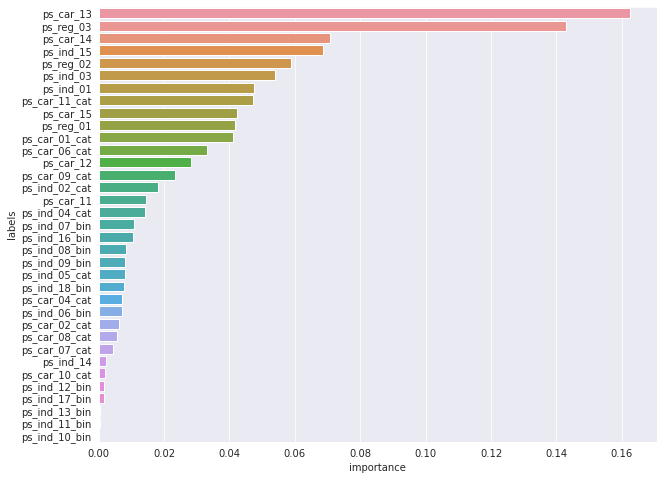

In [327]:
#Gráfico mostrando das variáveis com um maior grau de importância para de menor grau 
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='labels', orient = 'h',data=ft_importance_tree.sort_values(by='importance', ascending=False))

In [328]:
#Contrução da Função da métrica Gini Coefficient Normalized 
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)


In [332]:
# O coeficiente para o modelo base com o Decision Tree
baseline_gini_normalized = gini_normalized(y_test, yhat)
print('Coeficiente de Gini Normalized para o baseline: {}'.format(baseline_gini_normalized))

Coeficiente de Gini Normalized para o baseline: 0.012457494503408327


In [333]:
baseline_gini = gini(y_test, yhat)
print('Coeficiente de Gini para o baseline: {}'.format(baseline_gini))

Coeficiente de Gini para o baseline: 0.006001923895876307


### Random Forest

In [334]:
#Treinando o modelo
model_randomforest = RandomForestClassifier()
model_randomforest.fit(x_train, y_train)
#Predizendo os dados de saída
yhat_randomforest = model_randomforest.predict(x_test)

In [335]:
# O coeficiente para o modelo base com o Decision Tree
randomforest_gini_normalized = gini_normalized(y_test, yhat_randomforest)
print('Coeficiente de Gini Normalized para o modelo de Random Forest: {}'.format(randomforest_gini_normalized))

Coeficiente de Gini Normalized para o modelo de Random Forest: -0.0041412638700595705


In [336]:
randomforest_gini = gini(y_test, yhat_randomforest)
print('Coeficiente de Gini para o modelo de Random Forest: {}'.format(randomforest_gini))

Coeficiente de Gini para o modelo de Random Forest: -0.001995228701408565


In [148]:
#Importância das variáveis com o modelo Random Forest
ft_importance = baseline.feature_importances_
ft_importance = pd.DataFrame({'importance':ft_importance, 'labels': x_data.columns.values})
ft_importance

,importance,labels
0,0.048779,ps_ind_01
1,0.021341,ps_ind_02_cat
2,0.064151,ps_ind_03
3,0.017560,ps_ind_04_cat
4,0.014052,ps_ind_05_cat
5,0.006844,ps_ind_06_bin
6,0.007323,ps_ind_07_bin
7,0.007705,ps_ind_08_bin
8,0.007457,ps_ind_09_bin
9,0.000185,ps_ind_10_bin


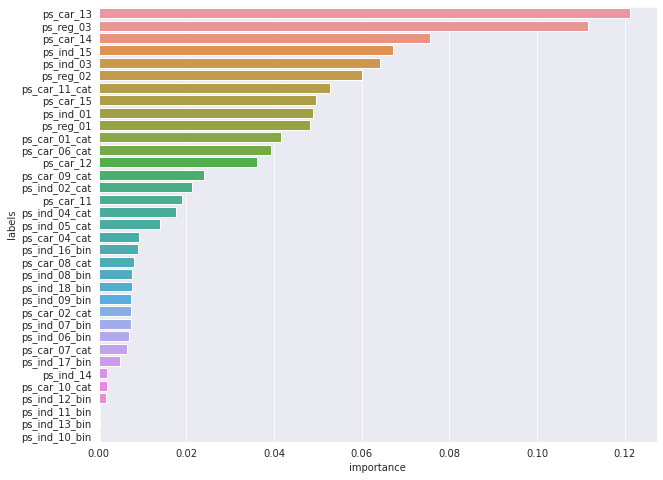

In [149]:
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='labels', orient = 'h',data=ft_importance.sort_values(by='importance', ascending=False))

### Undersampling e Oversampling

Nessa seção vamos testar dois métodos para tratamento dos dados desbalanceados. 

* O primeiro método é o de undersampling, que retira dados da variável dominante dos dados de treino. 

* O segundo método é o de oversampling, que cria novos dados da variável com o menor número de dados.

In [150]:
#Instalando o pacote  
!pip install imbalanced-learn

In [151]:
#Importando e analisando a versão 
import imblearn
print(imblearn.__version__)


0.4.3


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Undersampling**

In [152]:
from imblearn.under_sampling import RandomUnderSampler

In [337]:
#Instanciando o modelo de undersampling
#A estratégia escolhida, majority, faz com que o tratamento seja nos dados majoritários   
under=RandomUnderSampler(sampling_strategy='majority')

In [338]:
#Realizando o Holdup dos dados 
x_train, x_test_under, y_train, y_test_under = train_test_split(df_data.drop('target', axis=1), df_data.iloc[:, 0], test_size=0.4, random_state=0)


In [339]:
print(x_train.shape, y_train.shape)

(357127, 35) (357127,)


In [340]:
#realizando o tratamento de desbalanceamento dos dados
x_under, y_under = under.fit_resample(x_train, y_train)
print(x_under.shape, y_under.shape)

(26048, 35) (26048,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [341]:
#Treinando o modelo de Random Forest
rdforest2 = RandomForestClassifier()
rdforest2.fit(x_under, y_under)
#Predizendo os valores da variável alvo
yhat_randomforest_under = rdforest2.predict(x_test_under)

In [342]:
# O coeficiente para o modelo com tratamento undersampling
randomforest_under_gini_normalized = gini_normalized(y_test, yhat_randomforest_under)
print('Coeficiente de Gini Normalized para o modelo de Random Forest com tratamento undersampling: {}'.format(randomforest_under_gini_normalized))

Coeficiente de Gini Normalized para o modelo de Random Forest com tratamento undersampling: 0.15241004570046152


In [343]:
randomforest_under_gini = gini(y_test, yhat_randomforest_under)
print('Coeficiente de Gini para o modelo de Random Forest com tratamento undersampling: {}'.format(randomforest_under_gini))

Coeficiente de Gini para o modelo de Random Forest com tratamento undersampling: 0.0734299738210542


**Oversampling**

In [160]:
from imblearn.over_sampling import RandomOverSampler

In [344]:
#definindo a estratégia de oversampling
over=RandomOverSampler(sampling_strategy='minority')
#ajustando os dados
x_over, y_over = over.fit_resample(x_train, y_train)
#Criando o Random Forest
rdforest2 = RandomForestClassifier()
#Treinando o modelo
rdforest2.fit(x_over, y_over)
#Predizendo novos valores
yhat_randomforest_over = rdforest2.predict(x_test_under)
#Calculando a métrica Gini Normalized
randomforest_over_gini_normalized = gini_normalized(y_test, yhat_randomforest_over)
print('Coeficiente de Gini Normalized para o modelo de Random Forest com tratamento oversampling: {}'.format(randomforest_over_gini_normalized))
#Calculando a métrica Gini 
randomforest_over_gini = gini(y_test, yhat_randomforest_over)
print('Coeficiente de Gini para o modelo de Random Forest com tratamento oversampling: {}'.format(randomforest_over_gini))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Coeficiente de Gini Normalized para o modelo de Random Forest com tratamento oversampling: -0.004355797797823949
Coeficiente de Gini para o modelo de Random Forest com tratamento oversampling: -0.002098589478101899


In [162]:
print(x_over.shape, y_over.shape)

(688206, 35) (688206,)


Dos dois métodos, o que melhor performa é o undersampling, onde os dados são retirados de dados existentes, podendo perder informações importantes no processo. Já no caso do método oversampling é criado dados aleatórios dos exemplos minoritários e adicionados nos dados de treino.  

### XGBOOST

In [163]:
from xgboost import XGBClassifier

In [345]:
#Treinando o modelo xgboost
model = XGBClassifier()
model.fit(x_under, y_under)
#Predizendo novos valores
yhat_xgboost = model.predict(np.array(x_test_under))
#calculando o gini
gini_normalized(y_test_under, yhat_xgboost)
#Calculando a métrica Gini Normalized
xgboost_gini_normalized = gini_normalized(y_test, yhat_xgboost)
print('Coeficiente de Gini Normalized para o modelo de XGboost: {}'.format(xgboost_gini_normalized))
#Calculando a métrica Gini 
xgboost_gini = gini(y_test, yhat_xgboost)
print('Coeficiente de Gini para o modelo de XGboost: {}'.format(xgboost_gini))

Coeficiente de Gini Normalized para o modelo de XGboost: 0.18274042842181143
Coeficiente de Gini para o modelo de XGboost: 0.08804291615681346


### Conclusão



In [352]:
#Criando um dataframe com todos os dados do coeficiente de Gini 
data_gini_normalized = [baseline_gini_normalized, randomforest_gini_normalized, randomforest_under_gini_normalized, randomforest_over_gini_normalized, xgboost_gini_normalized]

data_gini = [baseline_gini, randomforest_gini, randomforest_under_gini, randomforest_over_gini, xgboost_gini]

index = ['Baseline', 'Random Forest', 'Random Forest Under', 'Random Forest Over', 'XGboost'] 

gini_comparacao = pd.DataFrame(data={'Gini Normalized': data_gini_normalized, 'Gini': data_gini}, index = index)

gini_comparacao.sort_values(by='Gini Normalized', ascending=False)

,Gini Normalized,Gini
XGboost,0.182740,0.088043
Random Forest Under,0.152410,0.073430
Baseline,0.012457,0.006002
Random Forest,-0.004141,-0.001995
Random Forest Over,-0.004356,-0.002099


In [353]:
#utilizando o relatório de classificação para o modelo XGboost
print(classification_report(y_test, yhat_xgboost))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76    229415
           1       0.05      0.56      0.10      8670

    accuracy                           0.62    238085
   macro avg       0.51      0.59      0.43    238085
weighted avg       0.94      0.62      0.73    238085



Analisando a métrica que foi escolhida, gini normalized, e olhando para o gráfico com a comparação de todos os coeficientes calculados, temos que o modelo que melhor performou foi o XGboost. Porém, em nível de precisão, como visualizado no relatório de classificação, a melhora na performance não entrega um resultado com uma alta confiabilidade para predizer que o cliente irá sofrer um sinistro.  